План 

1. Загрузка библиотек
2. Чтение файла
3. Предобработка данных 
4. Исследовательский анализ данных 
5. Подтверждение статистических гипотез
6. Сегментация 
7. Выводы 


Цели 

1. Определить значимые признаки отточности клиентов 
2. Интервалы значений, с которыми связана отточность 
3. Сравнение типичных портретов людей, которые склонны уходить и не склонны 
4. Провести статическое исследование
5. Выделить сегменты с наибольшей отточностью

Загрузка библиотек 

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats as st
import numpy as np
from phik.report import plot_correlation_matrix
from phik import report 
import math


Чтение файла

In [3]:
data = pd.read_csv('bank_scrooge.csv')


In [4]:
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Как видно в файле есть колонки, написанные крупным шрифтом. Их нужно будет привести к нижнему регистру и переименовать

Предобработка данных

In [6]:
data.set_axis(data.columns.str.lower(), axis='columns', inplace=True)
# приводим колонки к нижнему регистру

In [7]:
data = data.rename (columns = {'userid': 'user_id'})
# переименовываем колонки 

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Как видно в колонке balance очень много пропусков. Нужно проверить, с чем это связано
В колонке age так же есть пропуски, но их очень мало, поэтому их можно оставить 

In [9]:
data.duplicated().sum()

0

In [10]:
data['user_id'].duplicated().sum()

73

Проверим колонку user_id на дубликаты. Дубликаты обнаружены. Нужно их убрать

In [11]:
data = data.drop_duplicates(subset=['user_id'])

In [12]:
data['user_id'].duplicated().sum()

0

In [13]:
data['score'].duplicated().sum()

9579

In [14]:
data['city'].duplicated().sum()

9924

In [15]:
data['gender'].duplicated().sum()

9925

In [16]:
data['equity'].duplicated().sum()

9917

In [17]:
data['balance'].duplicated().sum()

2263

In [18]:
data['products'].duplicated().sum()

9921

In [19]:
data['credit_card'].duplicated().sum()

9925

In [20]:
data['last_activity'].duplicated().sum()

9925

In [21]:
data['est_salary'].duplicated().sum()

3

In [22]:
data['churn'].duplicated().sum()

9925

Я проверил остальные признаки на дубликаты, но в них, скорее всего, речь идет об одинаковых значениях в силу естественных, а не технологических проблем, когда у разных пользователей могут быть одни и те же показатели. Кроме того, удаление этих дубликатов исказит изначальные данные до неузнаваемости. 

In [23]:
#data['age']= data['age'].astype('int32')
#data['age'].isna().sum()

In [24]:
data['age']

0       25.0
1       37.0
2       30.0
3       51.0
4       34.0
        ... 
9995    27.0
9996    46.0
9997    24.0
9998    68.0
9999    58.0
Name: age, Length: 9927, dtype: float64

In [25]:
data['age'] = data['age'].fillna(data['age'].median())

In [26]:
data['age']= data['age'].astype('int32')


In [27]:
data['age']

0       25
1       37
2       30
3       51
4       34
        ..
9995    27
9996    46
9997    24
9998    68
9999    58
Name: age, Length: 9927, dtype: int32

In [28]:
#data['products']= data.query('products !=0')

Я убрал нулевое значение продуктов, потому что пользователи банка так или иначе пользуются хотя бы одним продуктом банка, если являются его клиентами 

Я привел колонку age к формату int, чтобы избавиться от нулей

Я изменил размер шрифтов, убрал дубликаты, а также выявил пропуски 

Исследовательский анализ данных

Проверим колонки на выбросы. 

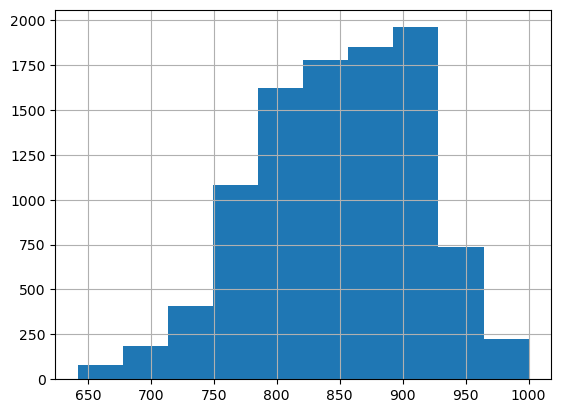

In [29]:
data['score'].hist();

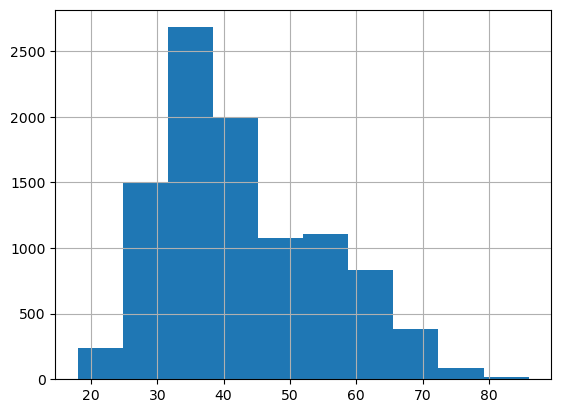

In [30]:
data['age'].hist();

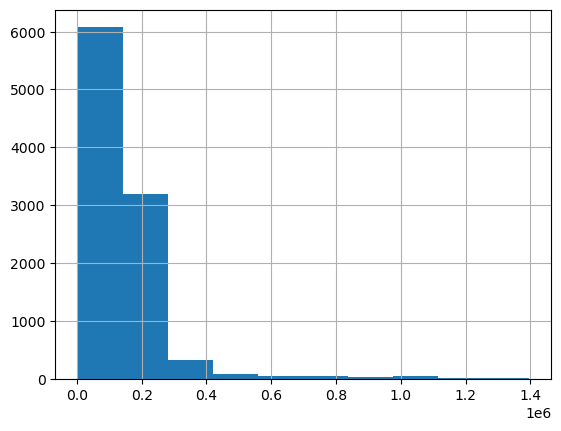

In [31]:
data['est_salary'].hist();

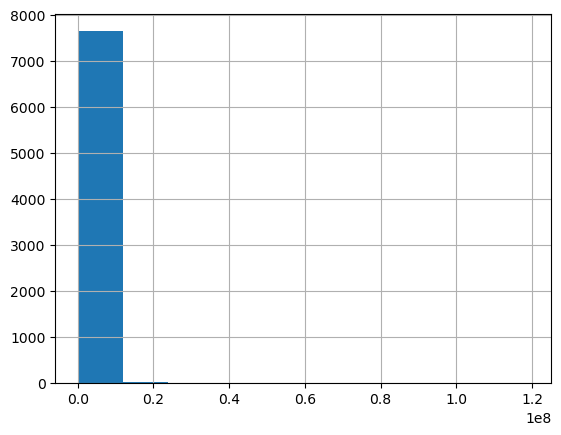

In [32]:
data['balance'].hist();

Во всех колонках кроме balance нормальное распределение. В колонке balance это может быть связано с большим количеством пропусков. Нужно посмотреть, возможно ли их заменить. Для этого мы построим функцию, которая позволит количество пропусков в их отношении к разным признакам

In [33]:
def balance_new (balance):
    if np.isnan (balance) == True:
        return 1 
    if np.isnan (balance) == False:
        return 0

In [34]:
data['new_balance'] = data['balance'].apply(balance_new)
data
# Как видно из таблицы теперь напротив пустых значений в колонке balance стоит цифра 1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,new_balance
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0
9996,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,1
9997,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,1
9998,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0


In [35]:
data['round_salary']= round(data['est_salary'], -4)
# округлим зарпалу, это позволит нам увеличить отрезки с уровнем зарплаты 

In [36]:
balance_nun = data.corr()
balance_nun = balance_nun.loc ['new_balance']
balance_nun.sort_values(ascending=False)
# построим корреляцию и выявим с какими признакми наблюдается наибольшая корреляция 

new_balance      1.000000
est_salary       0.307032
round_salary     0.306693
credit_card      0.157833
score            0.137821
last_activity    0.027821
user_id          0.003811
age             -0.026868
churn           -0.249174
products        -0.486193
equity          -0.708527
balance               NaN
Name: new_balance, dtype: float64

Как видно, самая высокая корреляция у пустых значений с признаком, означающим зарплату. Построим сводную таблицу, чтобы увидеть по сочетанию каких признаков наблюдается больше всего пропусков 

In [37]:
balance_by = data.pivot_table(index=['round_salary','credit_card','score'], values='new_balance',  aggfunc= {'sum','count'})
balance_by = balance_by.reset_index().sort_values(by = 'sum', ascending = False)
balance_by

,round_salary,credit_card,score,count,sum
4122,160000.0,1,918.0,6,5
5119,210000.0,1,903.0,6,5
5128,210000.0,1,913.0,6,5
4604,180000.0,1,920.0,5,5
2692,110000.0,1,909.0,4,4
...,...,...,...,...,...
2246,100000.0,0,946.0,1,0
2244,100000.0,0,929.0,1,0
2242,100000.0,0,925.0,2,0
2241,100000.0,0,924.0,1,0


Построенная сводная таблица не позволяет точно сказать с каким конкретным признаком связаны пропуски. Поскольку зарплаты обладали наибольшей корреляцией с пропусками, построим отдельный график, на котором можно было бы увидеть зависимость пропусков в колонке balance от уровня размера зарплаты 

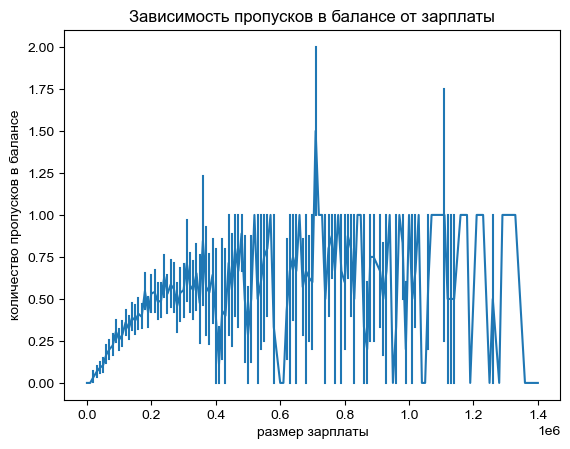

In [38]:
sns.lineplot(x = 'round_salary', y = 'sum',  err_style='bars', data = balance_by)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('размер зарплаты')
plt.ylabel('количество пропусков в балансе')
plt.title('Зависимость пропусков в балансе от зарплаты')
plt.show();

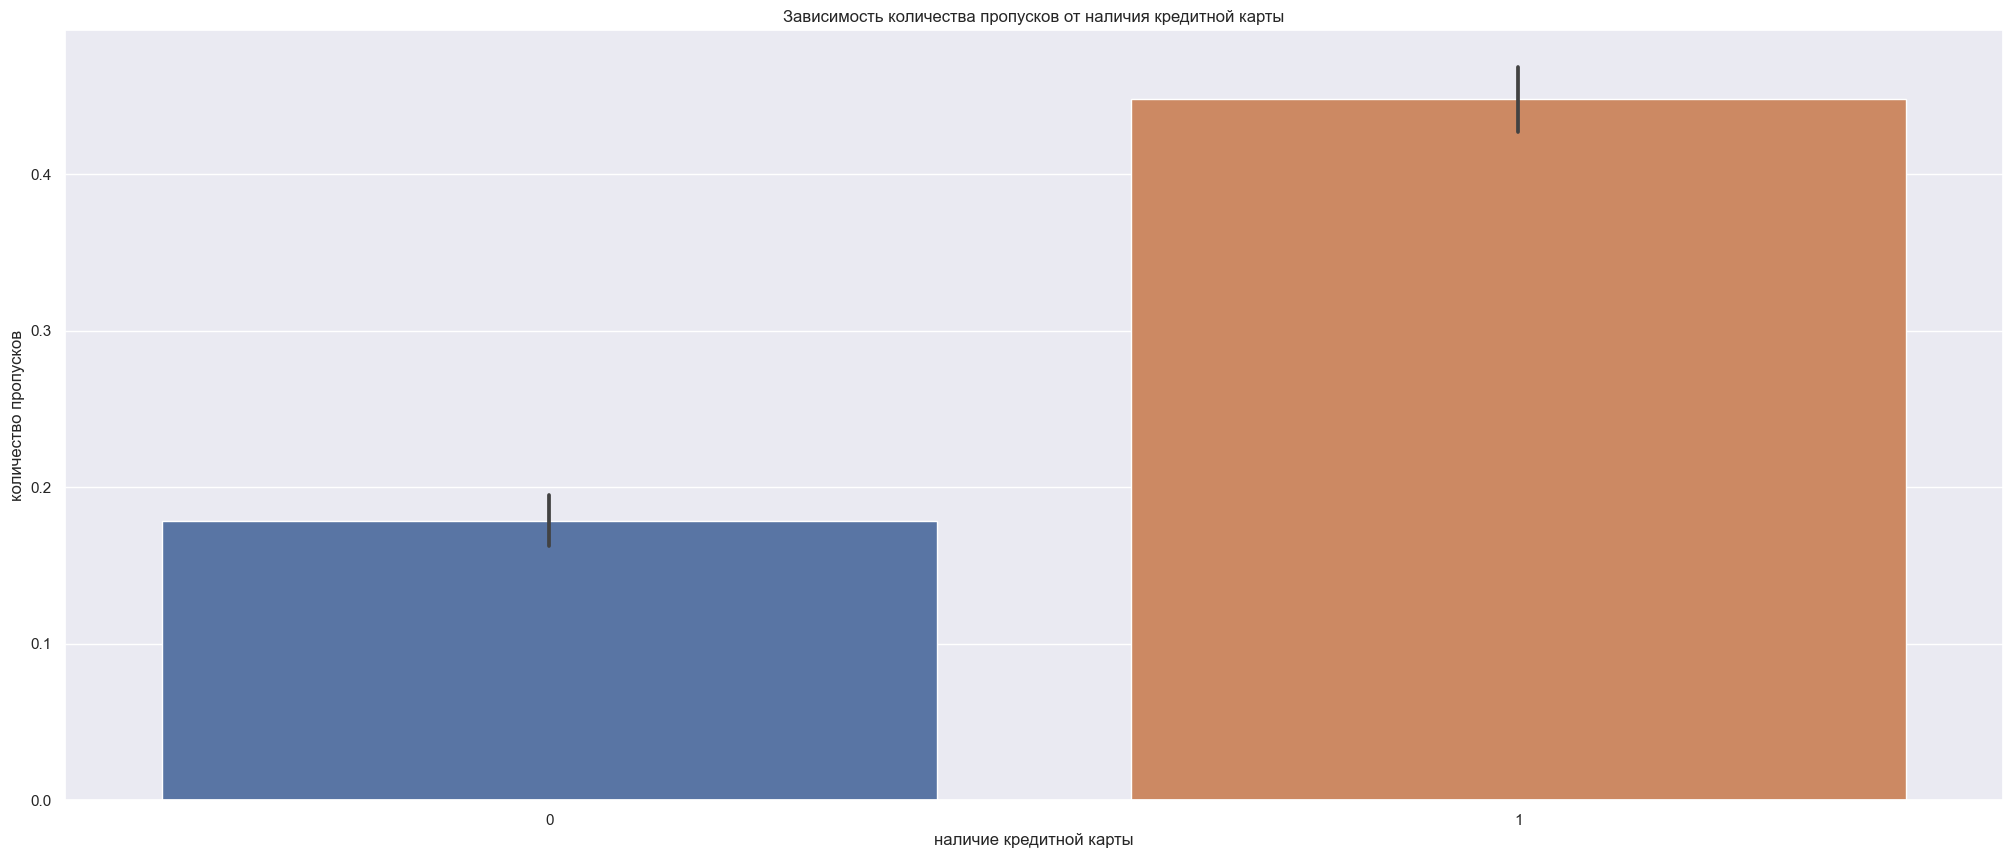

In [39]:
ax = sns.barplot(x= 'credit_card', y='sum', data=balance_by);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='наличие кредитной карты', ylabel='количество пропусков', title = 'Зависимость количества пропусков от наличия кредитной карты');

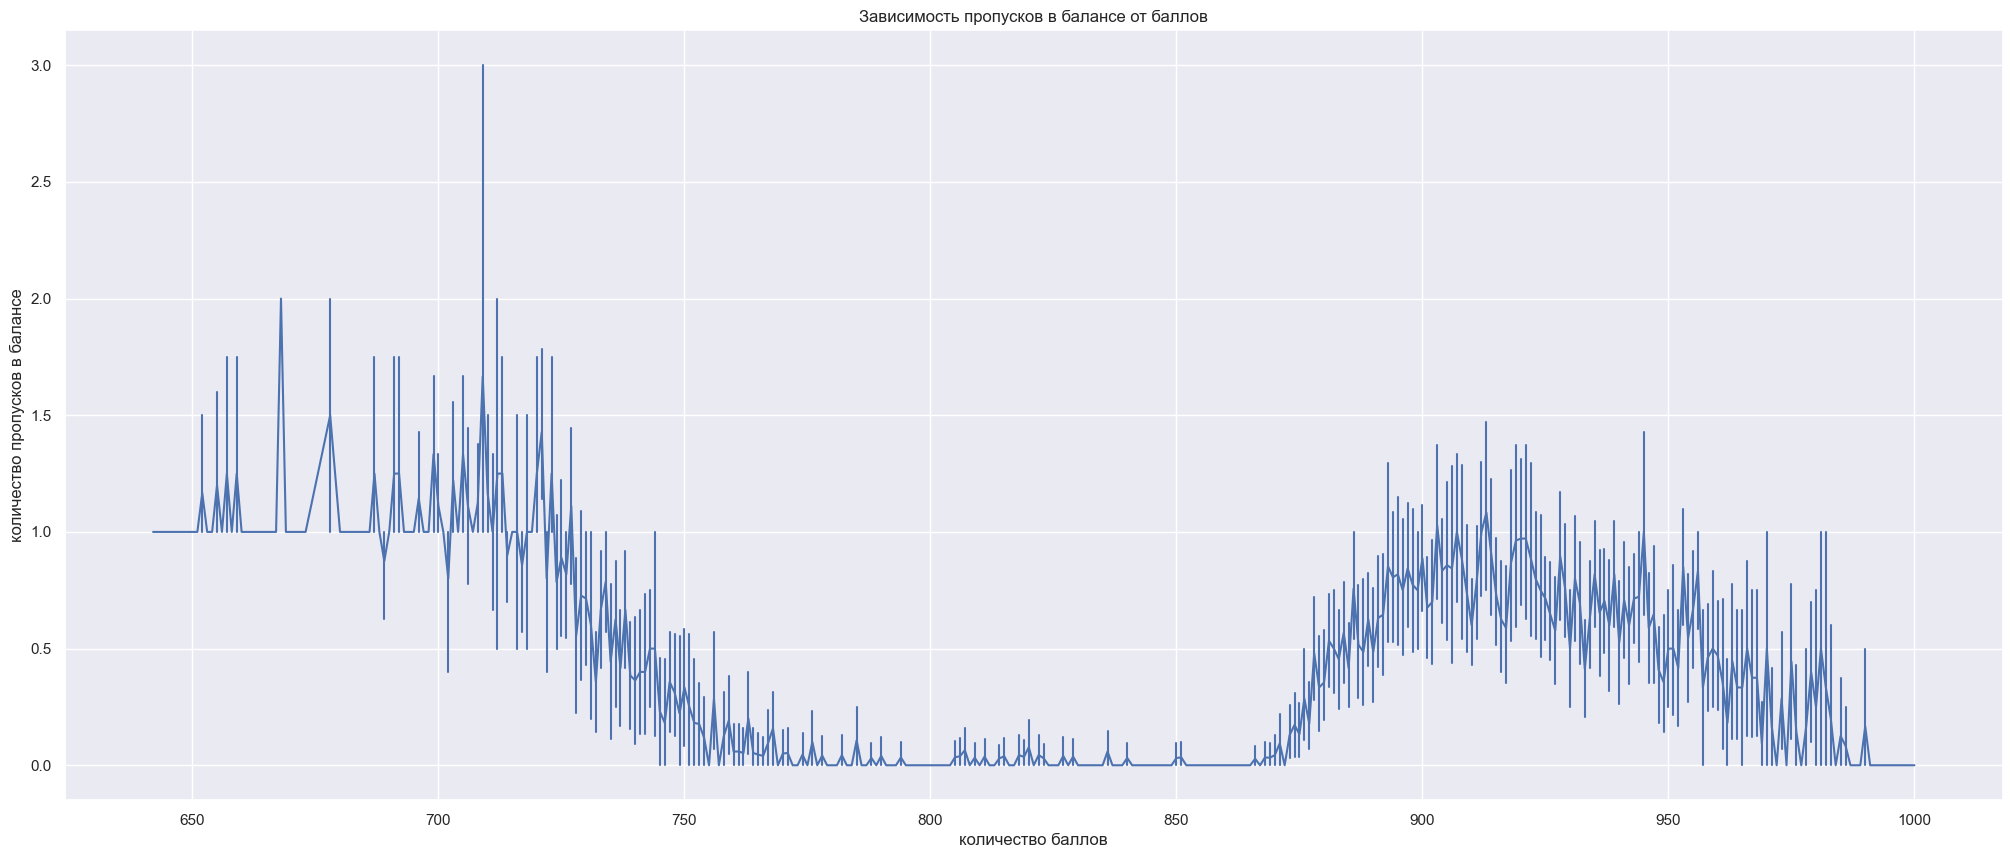

In [40]:
sns.lineplot(x = 'score', y = 'sum',  err_style='bars', data = balance_by)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('количество баллов')
plt.ylabel('количество пропусков в балансе')
plt.title('Зависимость пропусков в балансе от баллов')
plt.show();

Как видно, пропуски наблюдаются почти на всех уровнях зарплат. Таким образом, заменить пропуски с помощью подобной зависимости невозможно. Наличие кредитной карты так же не позволяет заменить пропуски. Количество баллов также не позволяет провести замены.
Поскольку в данном случае мы не можем заменить пропуски на 0 (в столбце уже есть строки с таким значением), а медиана исказит данные, мы оставим колонку balance так как она есть. В соотвествии классификациями, можно отнести такие пропуски к типу MAR - пропуски не зависят от переменных.  

In [41]:
city = pd.get_dummies(data['city'])
gender = pd.get_dummies(data['gender'])

Создадим две колонки, которые позволяют изучить корреляцию по городам и полу. 

In [42]:
banks =  data.join(city)

In [43]:
banks =  banks.join(gender)

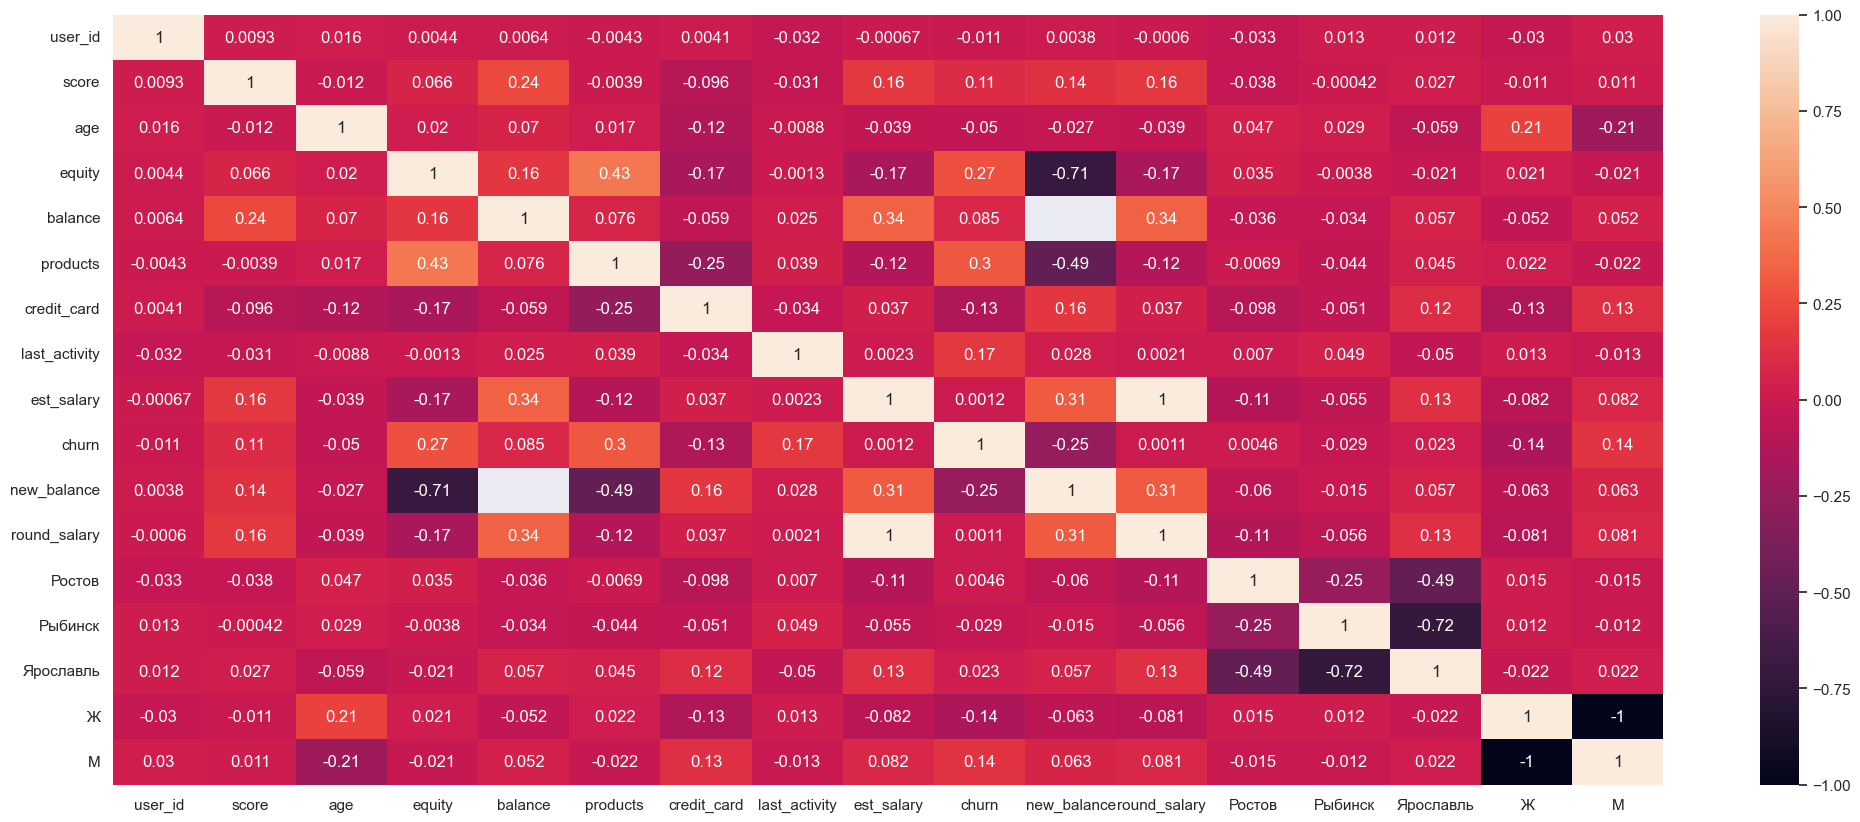

In [44]:
sns.heatmap(banks.corr(), annot = True);

In [45]:
banks_c = banks.corr()
churn_c = banks_c.loc ['churn']
churn_c.sort_values(ascending=False)

churn            1.000000
products         0.301325
equity           0.270304
last_activity    0.169505
М                0.141332
score            0.106263
balance          0.085343
Ярославль        0.022956
Ростов           0.004621
est_salary       0.001195
round_salary     0.001080
user_id         -0.010922
Рыбинск         -0.029164
age             -0.049765
credit_card     -0.130774
Ж               -0.141332
new_balance     -0.249174
Name: churn, dtype: float64

In [46]:
banks = banks.query('products !=0')
banks

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,new_balance,round_salary,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,80000.0,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,90000.0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,1,110000.0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,170000.0,0,0,1,1,0
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,70000.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27,1,78144.65,1,0,1,18943.64,0,0,20000.0,0,1,0,0,1
9996,139170,894.0,Ярославль,М,46,0,NaN,1,1,0,196898.29,0,1,200000.0,0,0,1,0,1
9997,115639,903.0,Ярославль,М,24,0,NaN,2,1,1,108905.09,0,1,110000.0,0,0,1,0,1
9998,148700,777.0,Ярославль,Ж,68,3,865457.97,3,0,1,86874.90,0,0,90000.0,0,0,1,1,0


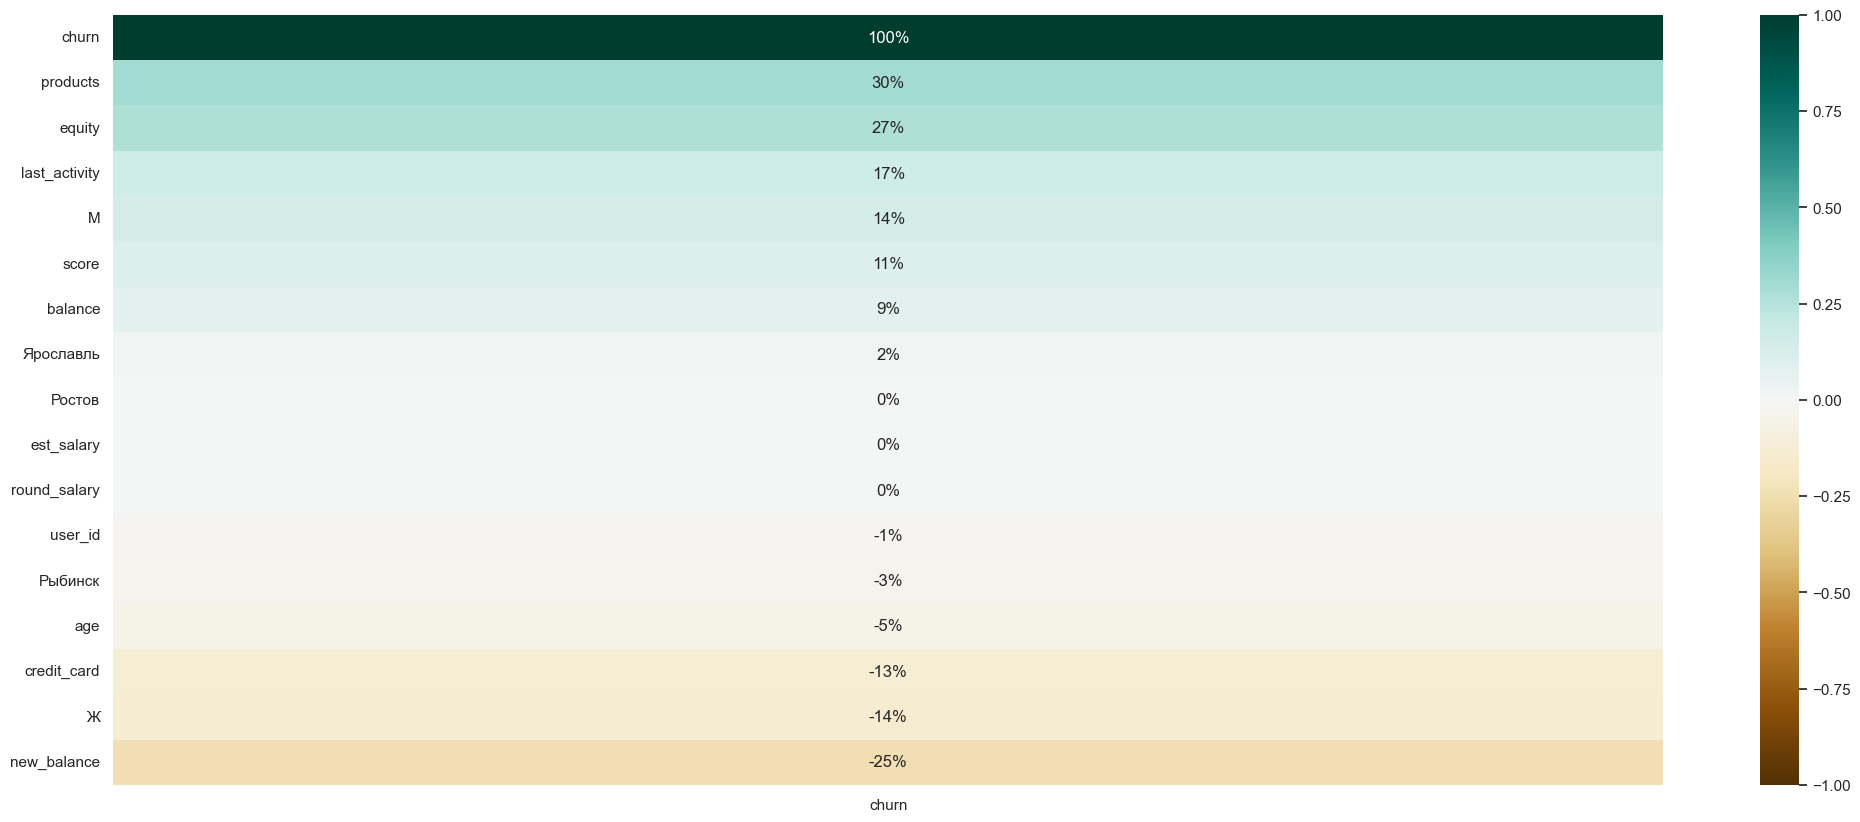

In [47]:
sns.heatmap(banks.corr()[['churn']].sort_values('churn',ascending=False ), vmin= -1, vmax = 1, annot= True, cmap='BrBG', center = 0, fmt= ".0%");

Как видно из таблицы наибольшая корреляция отточности клиентов связана с количеством продуктов, количеством собственности, последнией активностью. Среди отточных клиентов, судя по всему, больше мужчин. Далее мы рассмотрим каждый признак более детально,чтобы составить портреты 

In [48]:
data_percent = sum(data['churn'])/data['churn'].count() * 100
data_percent

18.33383701017427

Всего процент отточных клиентов из всего датасета - 18

In [49]:
column_products = data.pivot_table(index=['products'], values='churn', aggfunc= {'sum'})
column_products = column_products.reset_index()
column_products = column_products.query('products != 0')
column_products

,products,sum
1,1,235
2,2,979
3,3,297
4,4,300
5,5,8


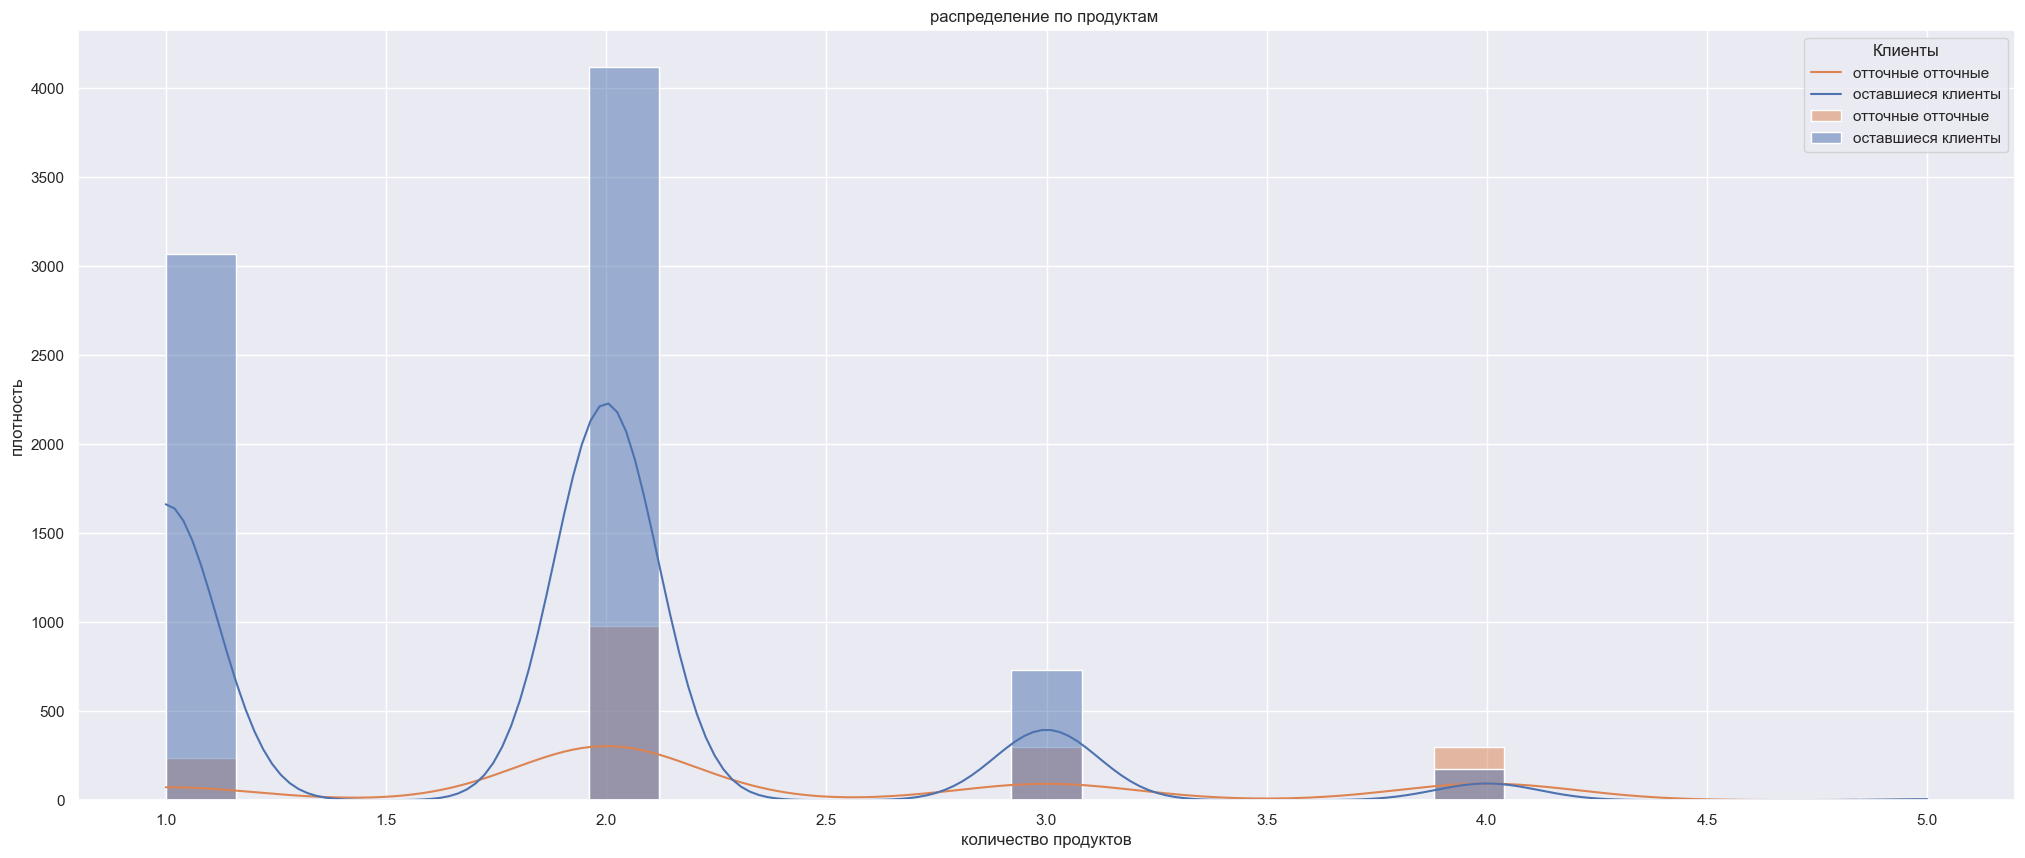

In [50]:
sns.histplot(data= banks, x = 'products', kde = True, hue = 'churn', bins = 25);
plt.title('распределение по продуктам ')
plt.legend(['отточные отточные','оставшиеся клиенты', 'отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.xlabel('количество продуктов')
plt.ylabel('плотность')
plt.show()

Как видно из графика больше всего отточных клиентов у клиентов, пользующихся более чем одним продуктом

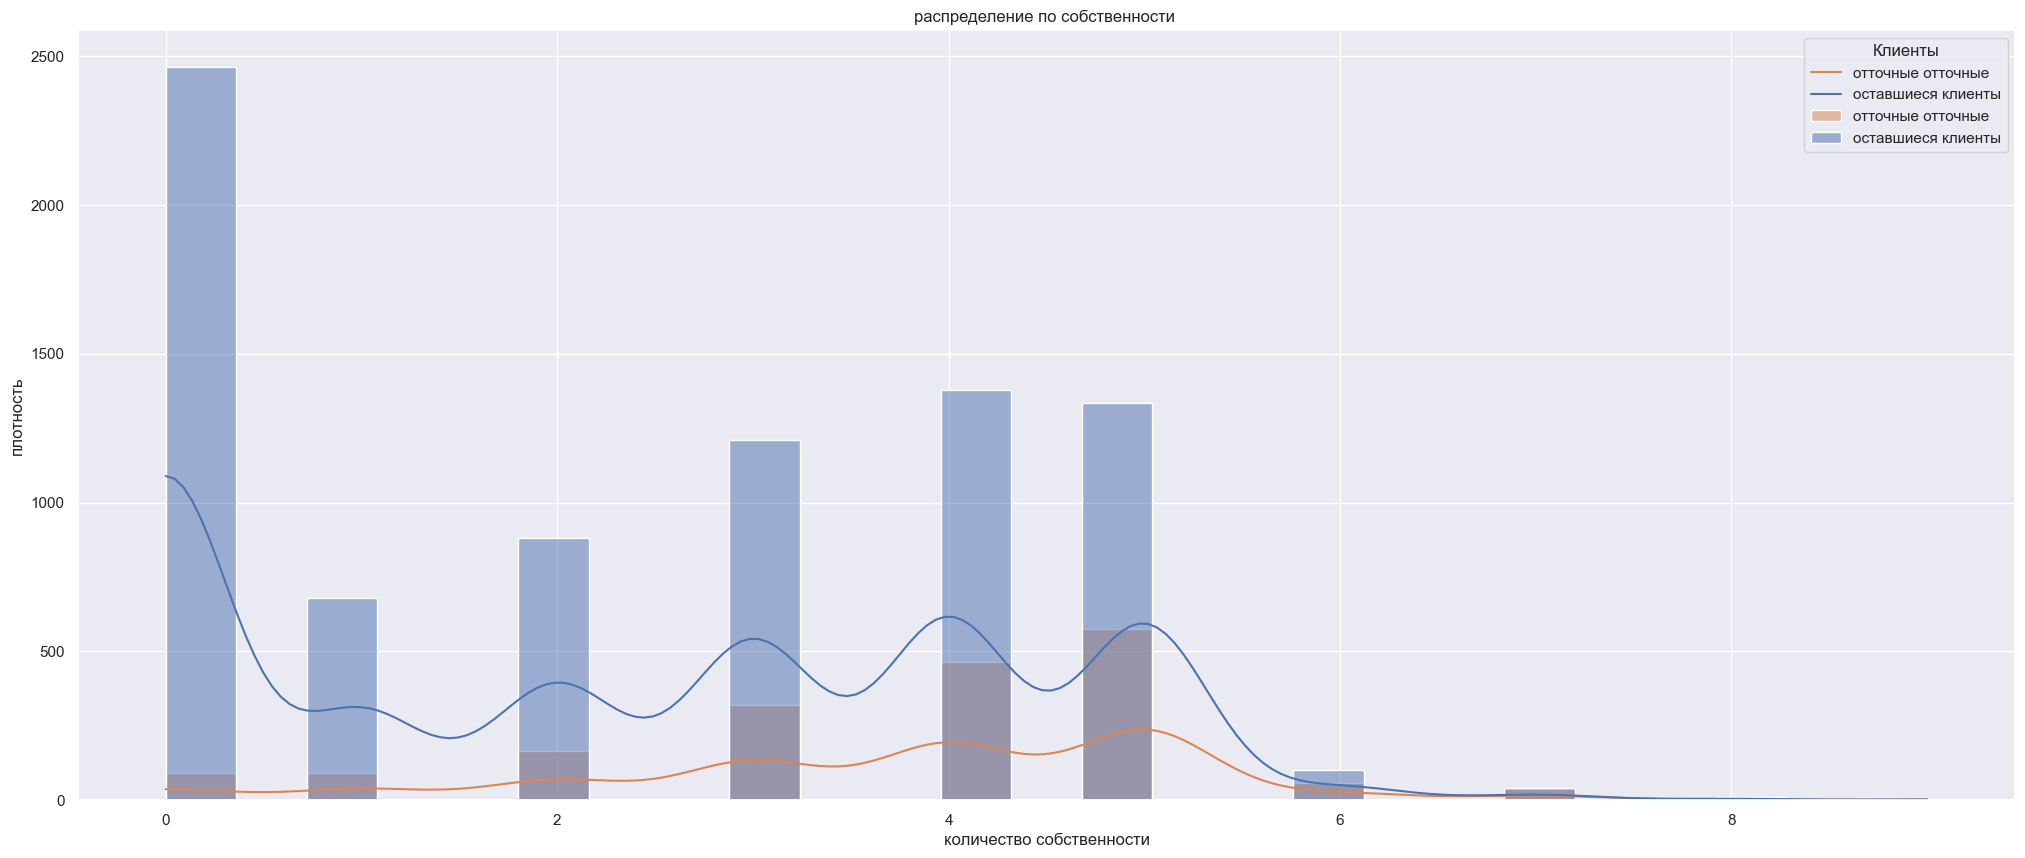

In [51]:
sns.histplot(data= banks, x = 'equity', kde = True, hue = 'churn', bins = 25);
plt.legend(['отточные отточные','оставшиеся клиенты', 'отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.title('распределение по собственности ')
plt.xlabel('количество собственности')
plt.ylabel('плотность')
plt.show()

Больше всего клиентов среди тех, кто не владеет собственностью

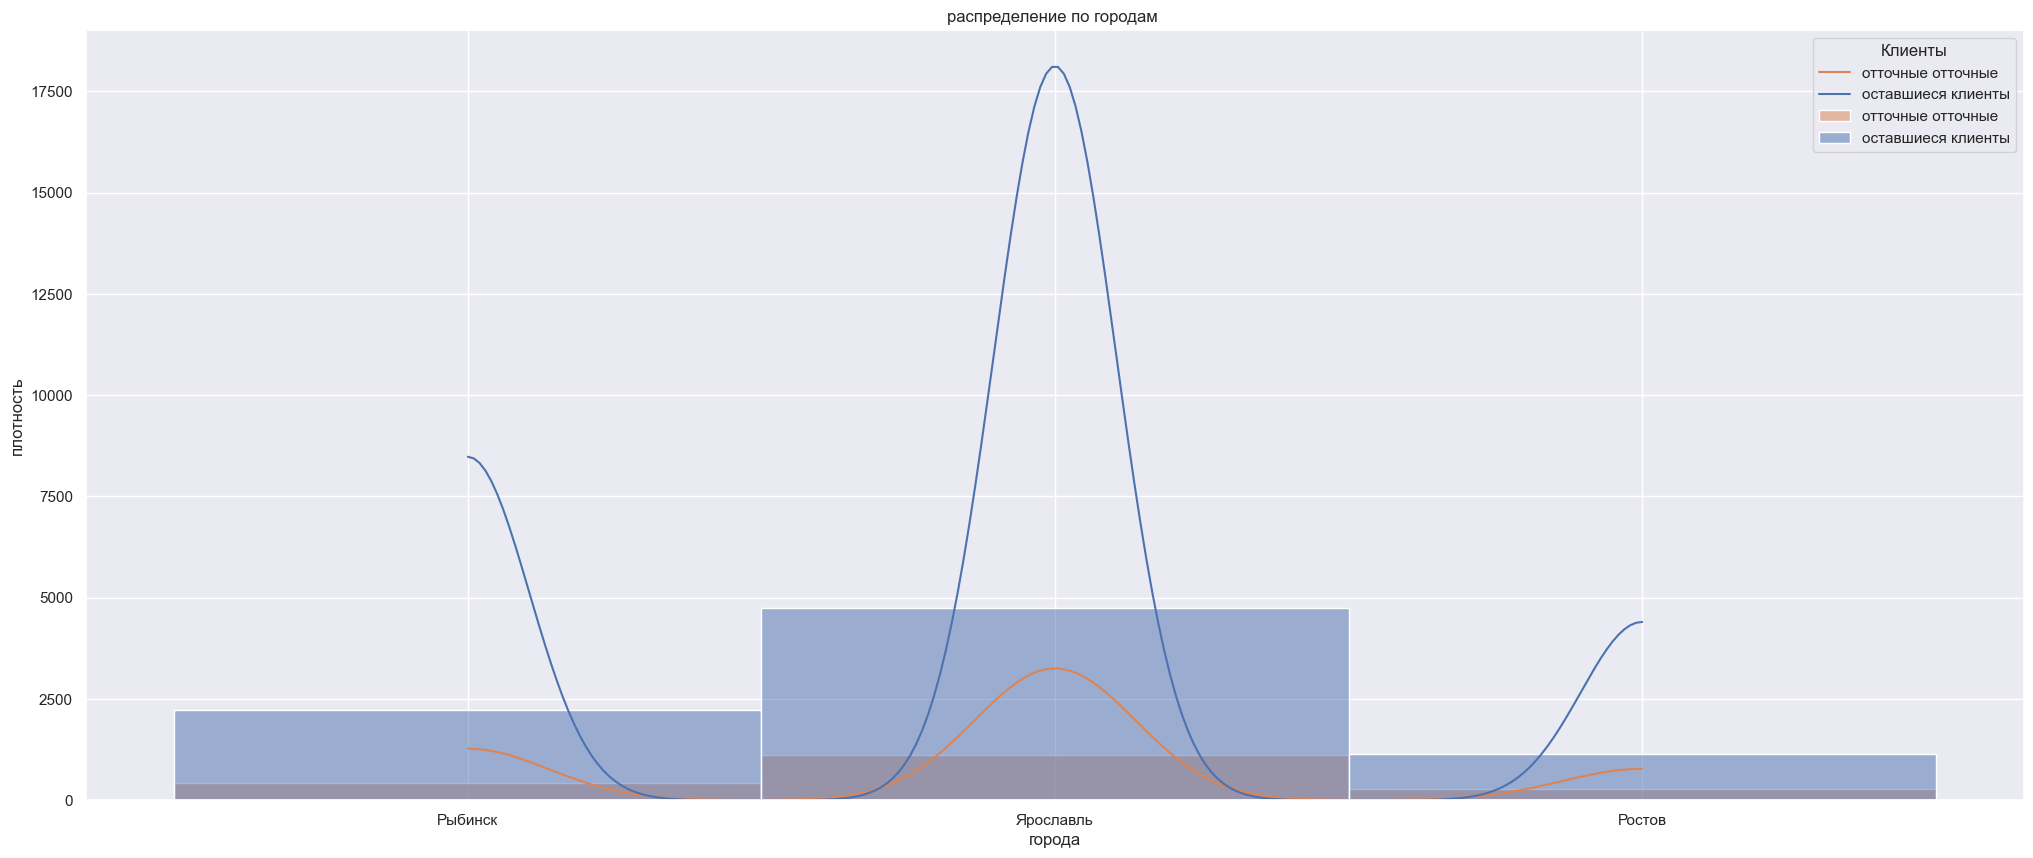

In [52]:
sns.histplot(data= data, x = 'city', kde = True, hue = 'churn', bins = 70);
plt.legend(['отточные отточные','оставшиеся клиенты', 'отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.title('распределение по городам ')
plt.xlabel('города')
plt.ylabel('плотность')
plt.show()

Больше всего клиентов, в том числе отточных в Ярославле

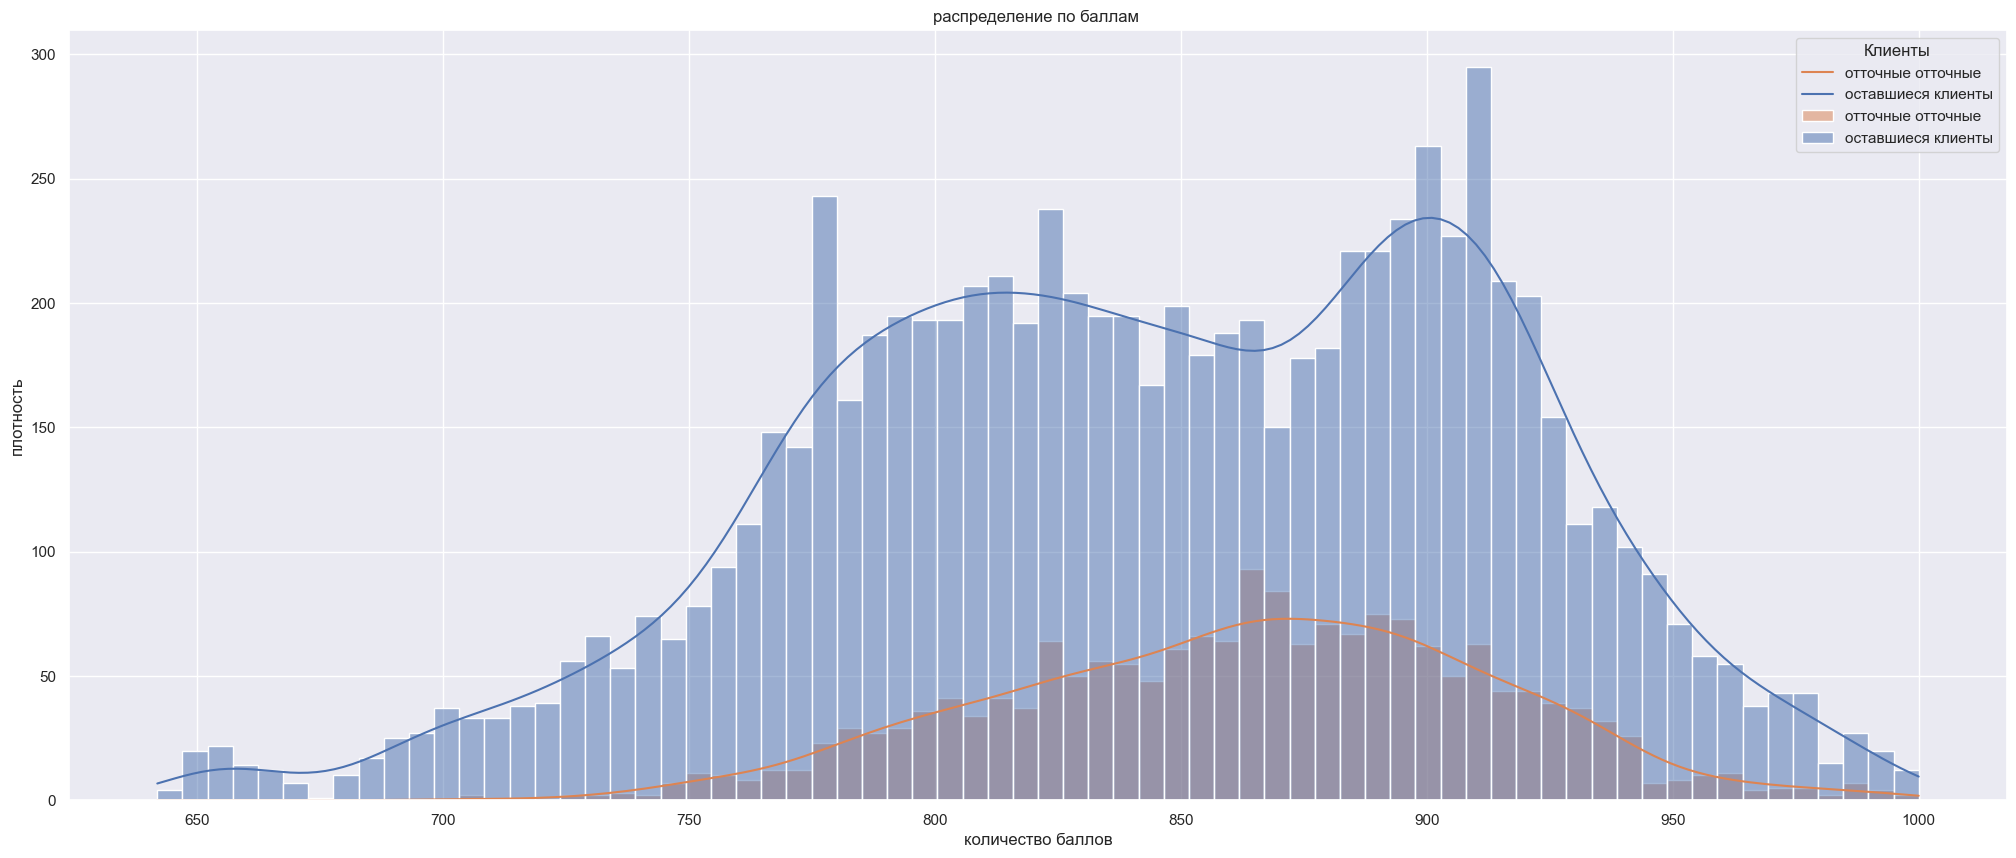

In [53]:
sns.histplot(data= data, x = 'score', kde = True, hue = 'churn', bins = 70);
plt.legend(['отточные отточные','оставшиеся клиенты', 'отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.title('распределение по баллам ')
plt.xlabel('количество баллов')
plt.ylabel('плотность')
plt.show()

Больше всего клиентов в интервале от 750 до 900

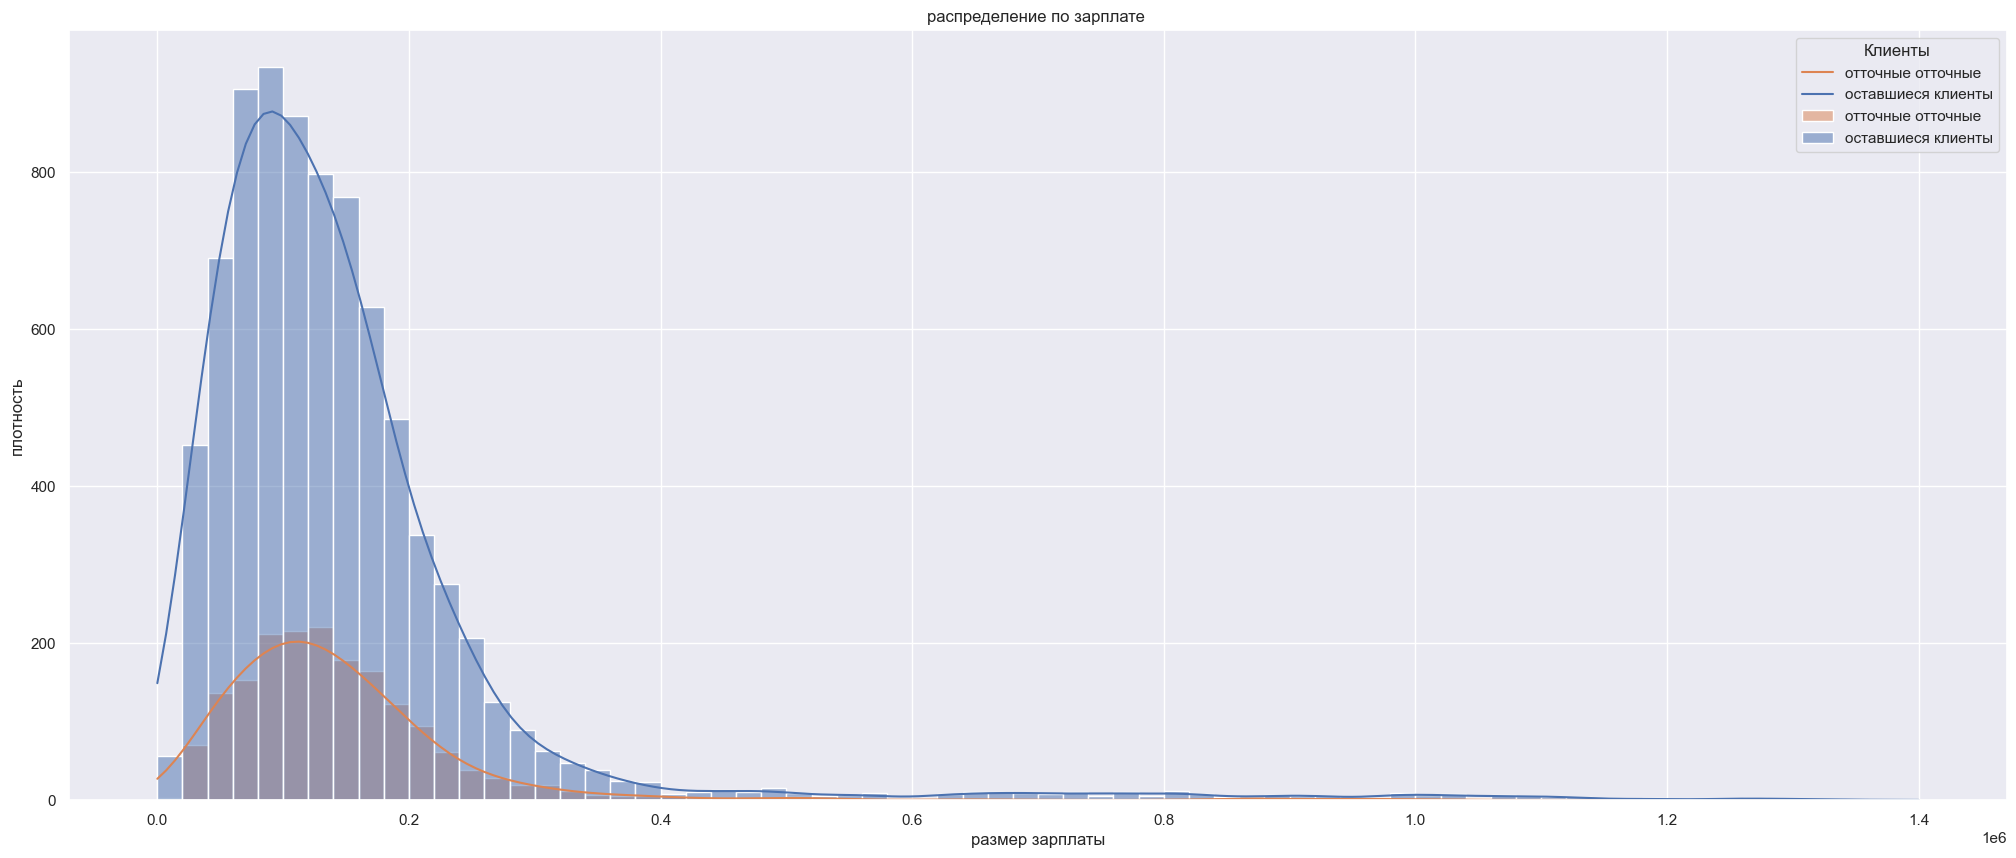

In [54]:
sns.histplot(data= data, x = 'round_salary', kde = True, hue = 'churn', bins = 70);
plt.legend(['отточные отточные','оставшиеся клиенты', 'отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.title('распределение по зарплате ')
plt.xlabel('размер зарплаты')
plt.ylabel('плотность')
plt.show()

Больше всего клиентов с зарплатой в интервале от 60 до 400 тыс. 

In [55]:
data['churn'].isna().sum()

0

In [56]:
data['age'].isna().sum()

0

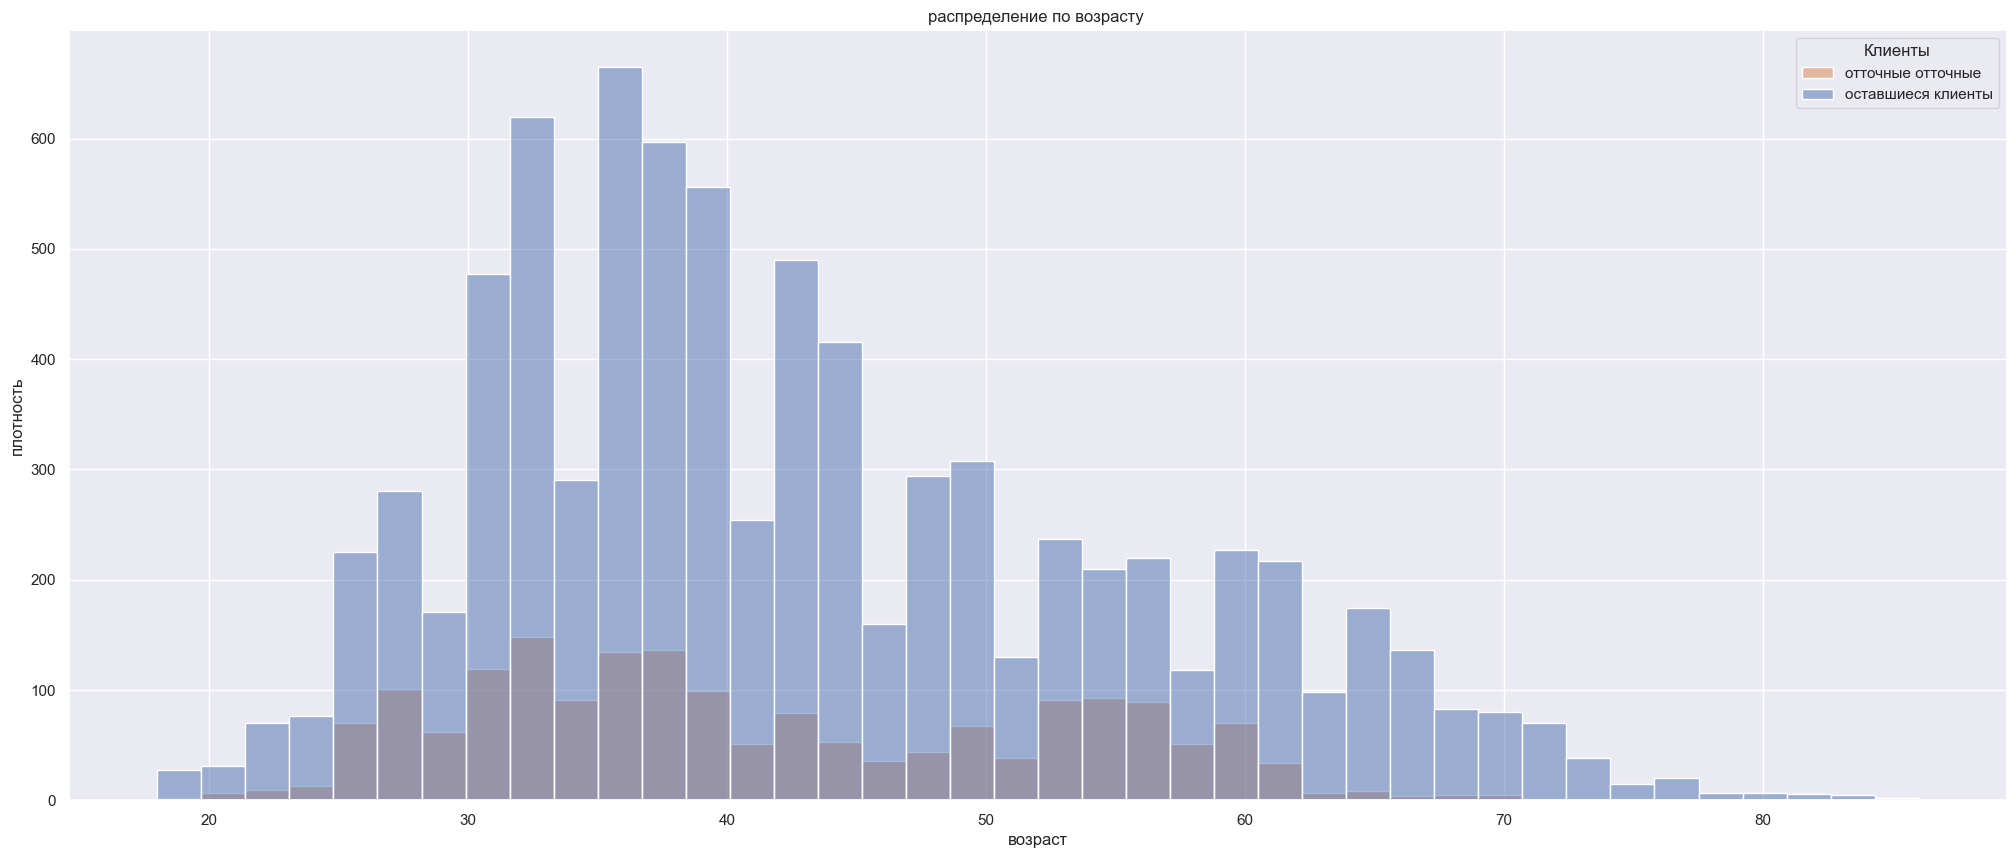

In [57]:
sns.histplot(data= data, x = 'age', hue = 'churn', bins = 40);
plt.title('распределение по возрасту ')
plt.legend(['отточные отточные','оставшиеся клиенты'], title='Клиенты')
plt.xlabel('возраст')
plt.ylabel('плотность')
plt.show()

In [58]:
#data['products'] = data.query('products != 0')

In [59]:
quit_by_products = data.pivot_table(index=['products'], values='churn', aggfunc= {'sum','count'})
quit_by_products = quit_by_products.reset_index()
quit_by_products['percent'] = quit_by_products['sum']/quit_by_products['count']*100
quit_by_products = quit_by_products.query('products != 0')
quit_by_products.sort_values(by = 'sum', ascending=False) 


,products,count,sum,percent
2,2,5099,979,19.199843
4,4,474,300,63.291139
3,3,1028,297,28.891051
1,1,3306,235,7.108288
5,5,19,8,42.105263


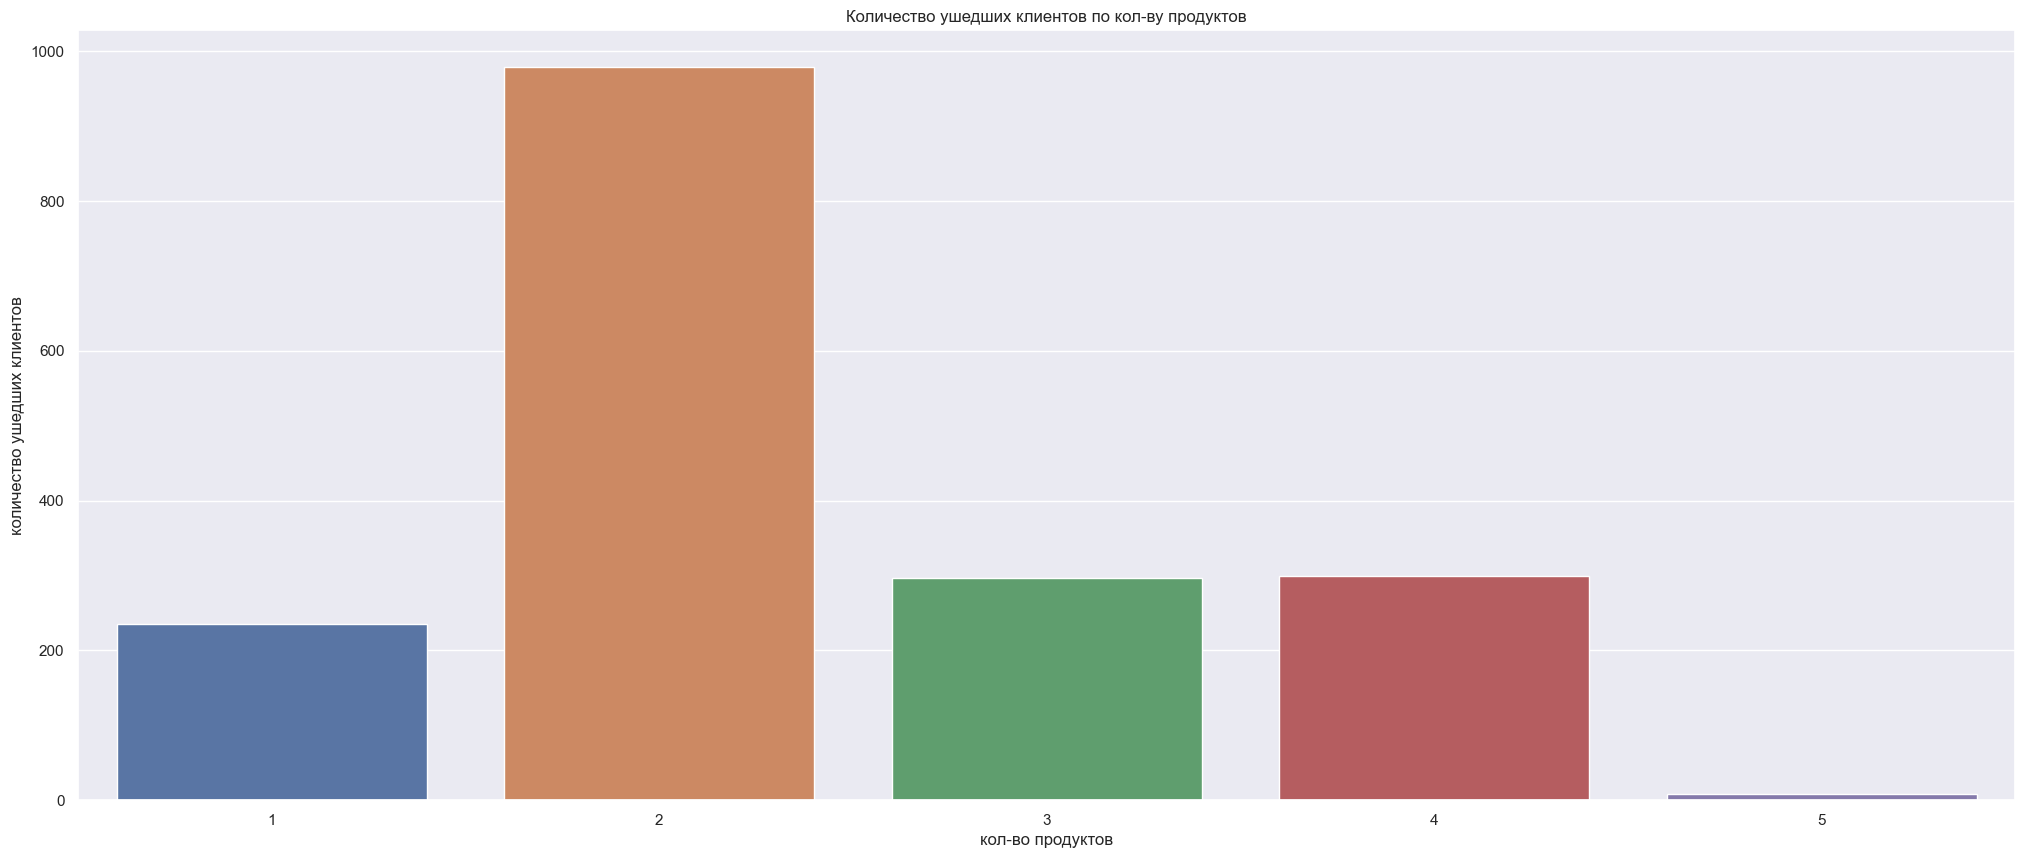

In [60]:
ax = sns.barplot(x= 'products', y='sum', data=quit_by_products);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='кол-во продуктов', ylabel='количество ушедших клиентов', title = 'Количество ушедших клиентов по кол-ву продуктов');

График показывает, что больше всего отточных клиентов использовало 2 продукта. Оттока в процентном соотношении отточных клиентов в подгруппах было больше среди клиентов, использовавших 4 продукта - 63 % и 3 продукта - 29 %. Клиентов с 5тью продуктами было настолько мало, что мы не будем брать их в рассчет

In [61]:
data_by_2_products =  data.query('products >= 2 and products <=4')
count_churn = data_by_2_products['churn'].count()
sum_churn = sum(data_by_2_products['churn'])
round ((sum_churn / count_churn) * 100)

24

In [62]:
count_churn_total = data['churn'].count()
sum_churn = sum(data_by_2_products['churn'])
round ((sum_churn / count_churn_total) * 100)

16

Срез размером с 2 по 4 продукта, позволяют выявить, каков процент оттока  внутри датасета с этим срезом - 24 %, и поотношению ко всему датасету - 16%

In [63]:
quit_by_equity = data.pivot_table(index=['equity'], values='churn', aggfunc= {'sum','count'})
quit_by_equity = quit_by_equity.reset_index()
quit_by_equity['percent'] = quit_by_equity['sum']/quit_by_equity['count']*100
quit_by_equity.sort_values(by = 'percent', ascending=False)

,equity,count,sum,percent
9,9,13,7,53.846154
7,7,79,37,46.835443
6,6,161,58,36.024845
8,8,17,6,35.294118
5,5,1911,577,30.193616
4,4,1841,464,25.203694
3,3,1533,322,21.004566
2,2,1046,166,15.869981
1,1,772,93,12.046632
0,0,2554,90,3.523884


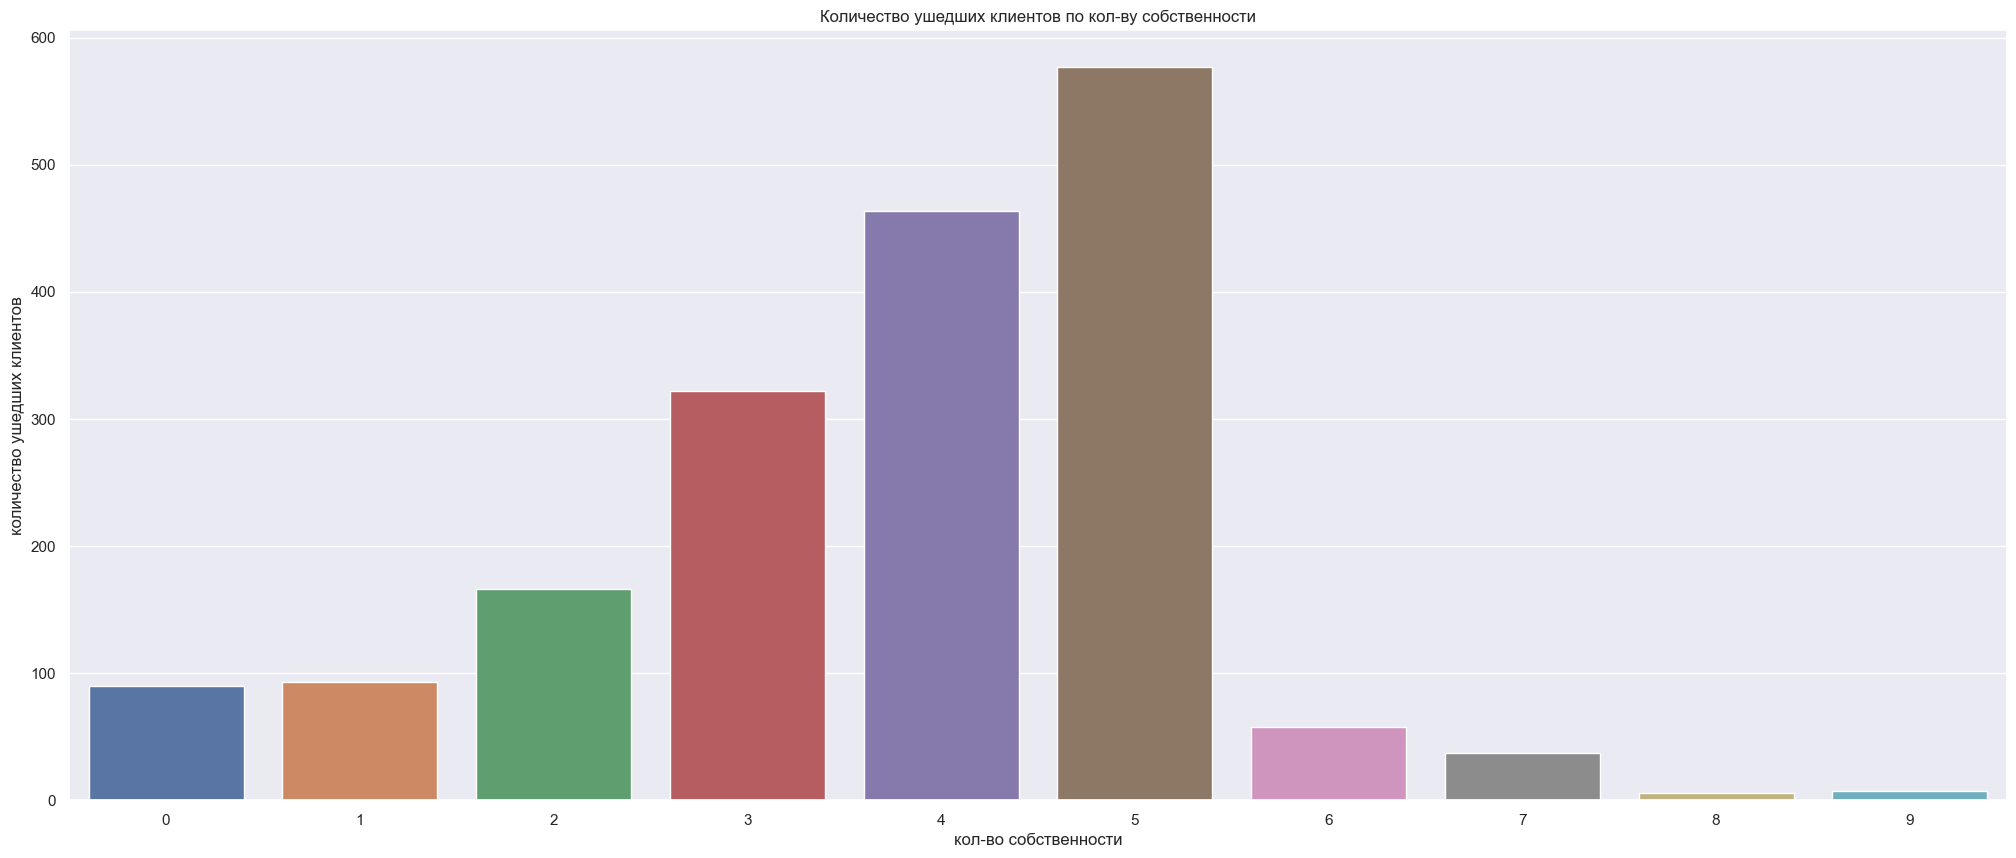

In [64]:
ax = sns.barplot(x= 'equity', y='sum', data=quit_by_equity);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='кол-во собственности', ylabel='количество ушедших клиентов', title = 'Количество ушедших клиентов по кол-ву собственности');


Как видно из графика больше всего отточных среди клиентов, владеющих от 3 до 5 пунктов собственности. 

In [65]:
data_by_3_equity =  data.query('equity >= 3 and equity <=5')
count_churn_e = data_by_3_equity['churn'].count()
sum_churn_e = sum(data_by_3_equity['churn'])
round (sum_churn_e / count_churn_e * 100)

26

In [66]:
count_churn_e_total = data['churn'].count()
sum_churn_e = sum(data_by_3_equity['churn'])
round (sum_churn_e / count_churn_e_total * 100)

14

Далее мы сделаем срез и проверим каков процент отточных клиентов внутри датасета со срезом по сообственности внутри группы - 26%, и по отношению ко всему датасету - 14% 

In [67]:
quit_by_equity_3 = data_by_3_equity.pivot_table(index=['equity'], values='churn', aggfunc= {'sum','count'})
quit_by_equity_3 = quit_by_equity_3.reset_index()
quit_by_equity_3['percent'] = quit_by_equity_3['sum']/quit_by_equity_3['count']*100
quit_by_equity_3.sort_values(by = 'percent', ascending=False)

,equity,count,sum,percent
2,5,1911,577,30.193616
1,4,1841,464,25.203694
0,3,1533,322,21.004566


В процентном соотношении в отношении каждой подкатегории процент отточных клиентов также достаточно велик. Для 3 - 21%, для 4 - 25%, для 5 - 30%

In [68]:
quit_by_last_activity = data.pivot_table(index=['last_activity'], values='churn', aggfunc= {'sum'})
quit_by_last_activity = quit_by_last_activity.reset_index()
quit_by_last_activity

,last_activity,sum
0,0,542
1,1,1278


Среди клиентов, совершавших последнее действие отточных клиентов больше - 1278

In [69]:
quit_by_last_activity_1 =  data.query('last_activity == 1')
count_churn_l = quit_by_last_activity_1['churn'].count()
sum_churn_l = sum(quit_by_last_activity_1['churn'])
round (sum_churn_l / count_churn_l * 100)

25

Внутри подгруппы с последним действием отточных клиентов целых 25 %

In [70]:
quit_by_last_activity_1 =  data.query('last_activity == 1')
count_churn_l_total = data['churn'].count()
sum_churn_l = sum(quit_by_last_activity_1['churn'])
round (sum_churn_l / count_churn_l_total * 100)

13

По отношению ко всему датасету отточных клиентов с последней активностью - 13 %

In [71]:
quit_by_age = data.pivot_table(index=['age'], values='churn', aggfunc= {'sum', 'count'})
quit_by_age = quit_by_age.reset_index()
quit_by_age['percent'] = quit_by_age['sum']/quit_by_age['count']*100
quit_by_age.sort_values(by = 'percent', ascending=False)

,age,count,sum,percent
61,79,2,1,50.000000
36,54,139,47,33.812950
34,52,153,50,32.679739
38,56,149,47,31.543624
9,27,171,53,30.994152
...,...,...,...,...
63,81,4,0,0.000000
64,82,2,0,0.000000
65,83,3,0,0.000000
66,84,2,0,0.000000


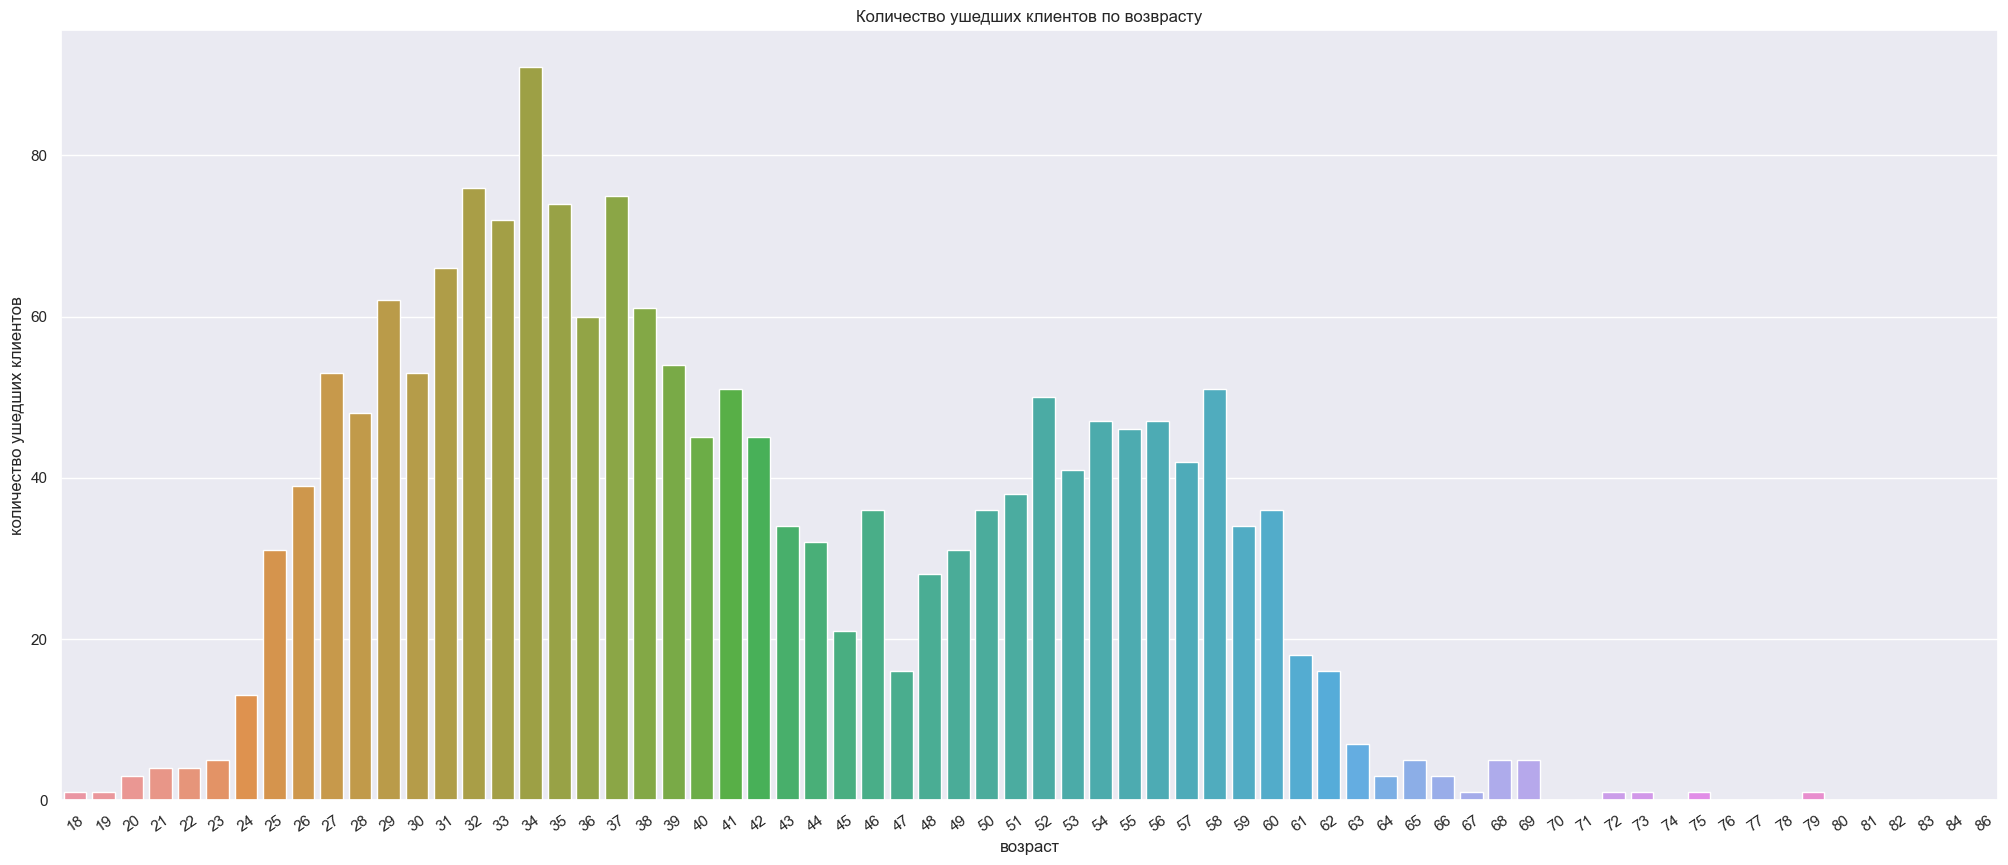

In [72]:
ax = sns.barplot(x= 'age', y='sum', data=quit_by_age);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='количество ушедших клиентов', title = 'Количество ушедших клиентов по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

Как видно в возрастном разрезе больше всего отточных клиентов в возрасте от 25 до 37 лет. Также много отточных клиентов в возрасте с 48 до 60 лет

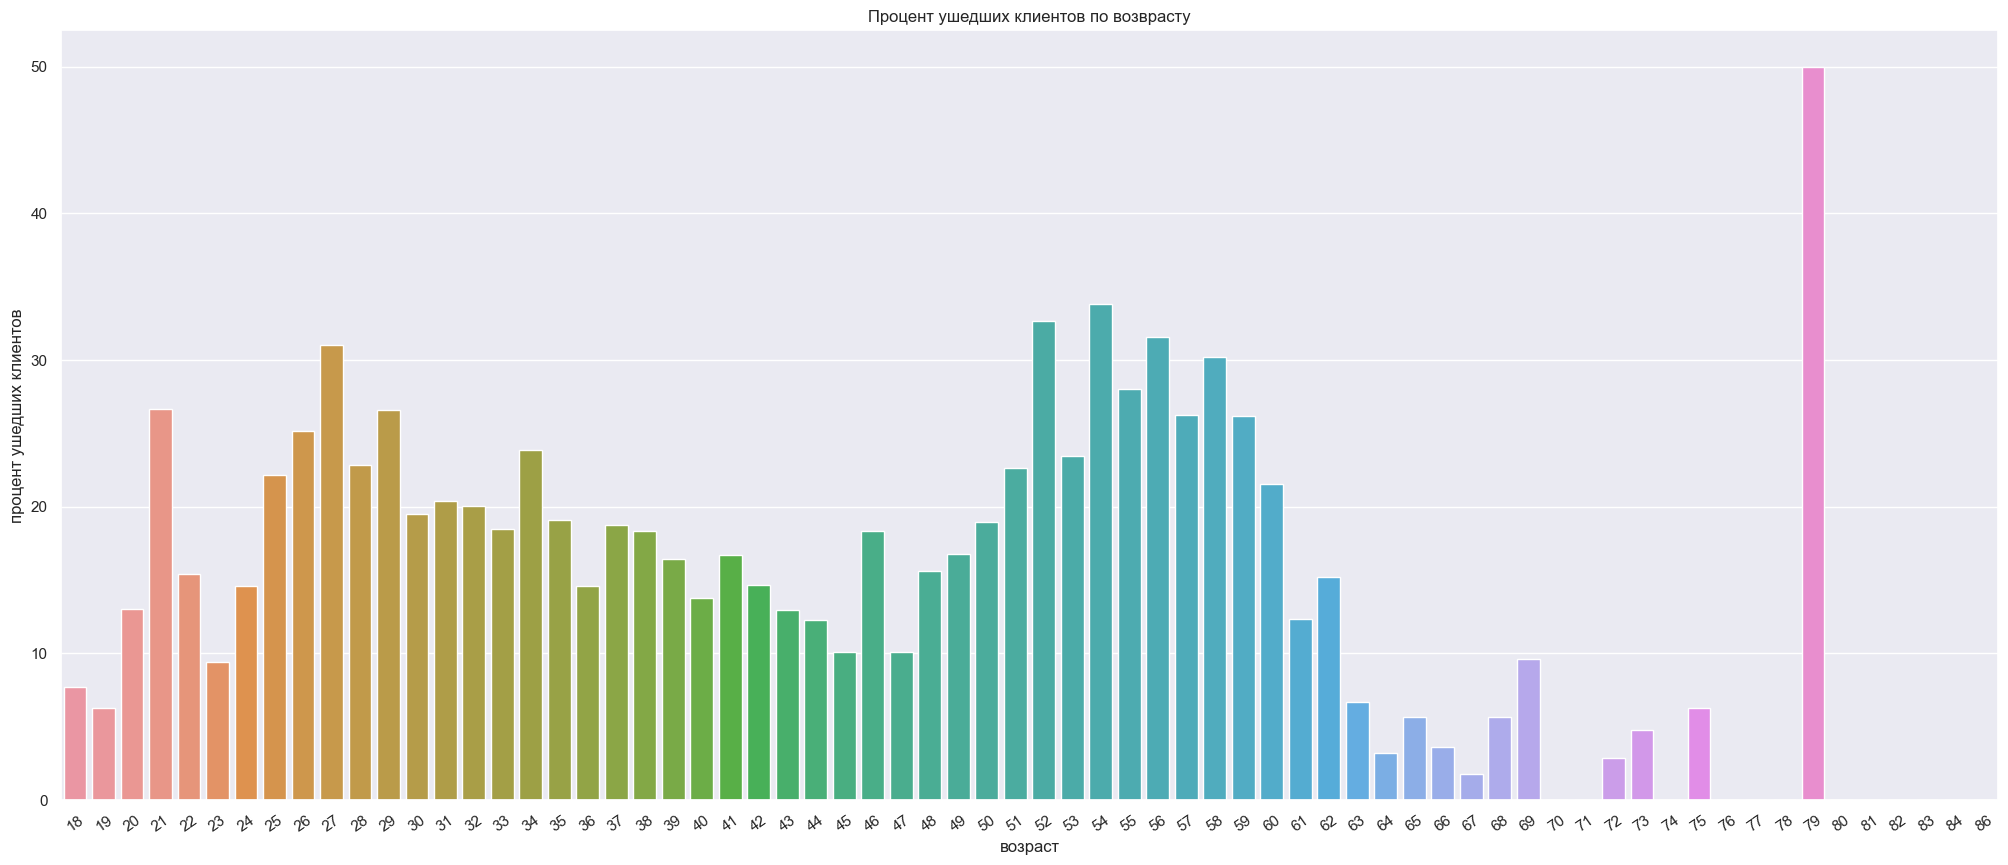

In [73]:
ax = sns.barplot(x= 'age', y='percent', data=quit_by_age);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='процент ушедших клиентов', title = 'Процент ушедших клиентов по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В процентом соотношении ситуация немного другая. По отношению к каждому отдельному возрасту процент отточных клиентов больше в отрезке с 48 до 60 лет

In [74]:
quit_by_age_1 =  data.query('age >= 26 and age <= 40 and gender == "М"')
count_churn_a = quit_by_age_1['churn'].count()
sum_churn_a = sum(quit_by_age_1['churn'])
round (sum_churn_a / count_churn_a * 100)

24

Процент отточных клиентов мужчин в возрастной категории от 26 до 40 лет - 24 % 

In [75]:
count_churn_a_total = data['churn'].count()
sum_churn_a = sum(quit_by_age_1['churn'])
round (sum_churn_a / count_churn_a_total * 100)

6

По отношению ко всему датасету процент этой категории - 6

In [76]:
quit_by_age_2 =  data.query('age >= 48 and age <=60 and gender == "М"')
count_churn_a_2 = quit_by_age_2['churn'].count()
sum_churn_a_2 = sum(quit_by_age_2['churn'])
round (sum_churn_a_2 / count_churn_a_2 * 100)

31

Внутри категории мужчин в возрасте от 48 до 60 лет - 5 % отточных клиентов

In [77]:
quit_by_age_2 =  data.query('age >= 48 and age <=60')
count_churn_a_2_total = data['churn'].count()
sum_churn_a_2 = sum(quit_by_age_2['churn'])
round (sum_churn_a_2 / count_churn_a_2_total * 100)

5

In [78]:
quit_by_age_female_26_40 = data.query('age >= 26 and age <=40 and gender == "Ж"')

In [79]:
count_by_f_26_40 = quit_by_age_female_26_40['churn'].count()
sum_churn_26_40 = sum(quit_by_age_female_26_40['churn'])
round (sum_churn_26_40 / count_by_f_26_40 * 100)

15

Среди женщин в возрасте от 26 до 40 лет процент отточных клиентов - 14

In [80]:
count_by_f_26_40_total = data['churn'].count()
sum_churn_26_40 = sum(quit_by_age_female_26_40['churn'])
round (sum_churn_26_40 / count_by_f_26_40_total * 100)

3

По отношению ко всему датасету процент отточных клиентов этой категории составляет - 3

In [81]:
quit_by_age_female_48_60 = data.query('age >= 48 and age <=60 and gender == "Ж"')

In [82]:
count_by_f_48_60 = quit_by_age_female_48_60['churn'].count()
sum_churn_48_60 = sum(quit_by_age_female_48_60['churn'])
round (sum_churn_48_60 / count_by_f_48_60 * 100)

20

Процент отточных клиентов среди женщин в возрасте от 48 до 60 лет составляет 20

In [83]:
count_by_f_48_60 = data['churn'].count()
sum_churn_48_60 = sum(quit_by_age_female_48_60['churn'])
round (sum_churn_48_60 / count_by_f_48_60 * 100) 

2

По отношению ко всему датасету процент отточных клиентов этой категории составляет - 2

Как видно отточных клиентов среди мужчин действительно намного больше. 
Далее мы категоризируем возраст в датасете для того, чтобы в дальнейшем составить портреты отточных пользователей. С этой целью мы сделаем функцию.

In [84]:
def avarage_age (age):
    if 18 <= age <= 23:
        return 'возраст между 18 и 23' 
    if 24 <= age <= 47:
        return 'возраст между 24 и 47' 
    if 48 <= age <= 60:
        return 'возраст между 48 и 60'
    if  age >= 61:
        return 'старше 61'

Выбор  основан на том, что и по сумме отточных клиентов и по проценту от общего числа клентов в интервалах в возрасте между 24 и 47 много отточных клиентов, также, как и в интервалах в возрасте от 48 до 60

In [85]:
data['avarage_age'] = data['age'].apply(avarage_age)

In [86]:
quit_by_score = data.pivot_table(index=['score'], values='churn', aggfunc= {'sum','count'})
quit_by_score = quit_by_score.reset_index()
quit_by_score['percent'] = quit_by_score['sum']/quit_by_score['count']*100
quit_by_score.sort_values(by = 'count', ascending=False)

,score,count,sum,percent
247,900.0,80,14,17.500000
236,889.0,74,21,28.378378
246,899.0,70,12,17.142857
241,894.0,69,15,21.739130
255,908.0,67,16,23.880597
...,...,...,...,...
16,662.0,1,0,0.000000
342,995.0,1,0,0.000000
31,684.0,1,0,0.000000
345,998.0,1,0,0.000000


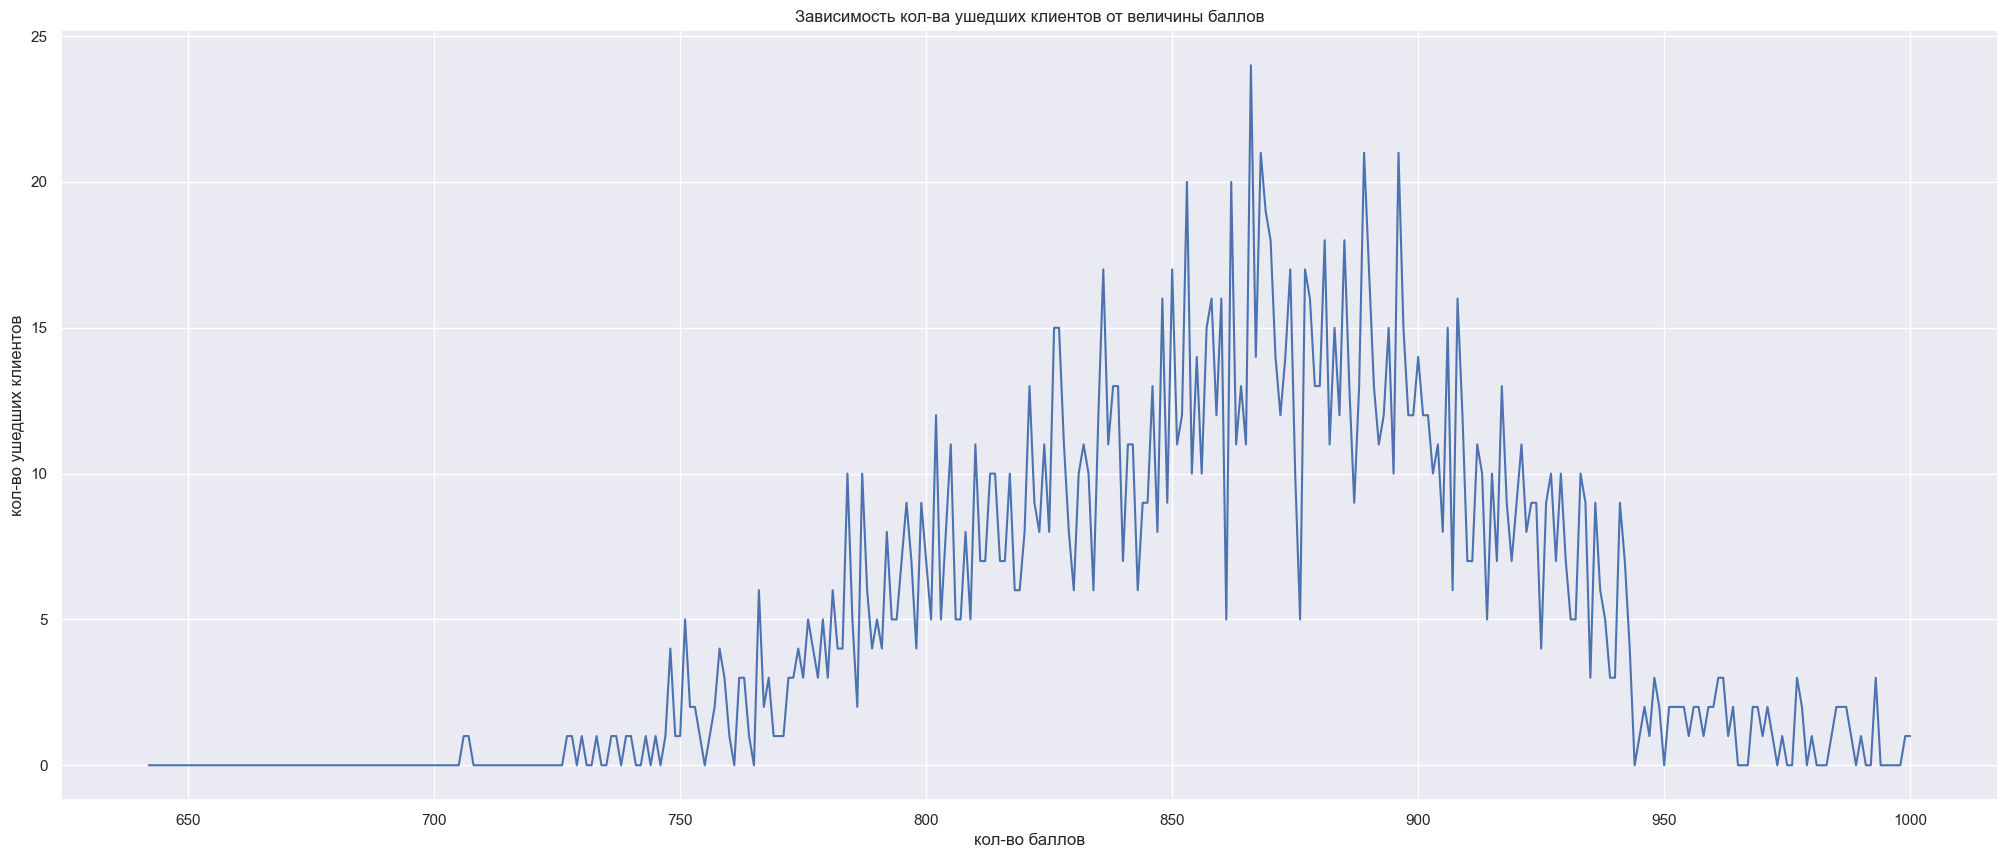

In [87]:
sns.lineplot(x = 'score', y = 'sum',  err_style='bars', data = quit_by_score)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('кол-во баллов')
plt.ylabel('кол-во ушедших клиентов')
plt.title('Зависимость кол-ва ушедших клиентов от величины баллов')
plt.show();

Как видно больше всего отточных клиентов в промежутке от 750 до 950 баллов

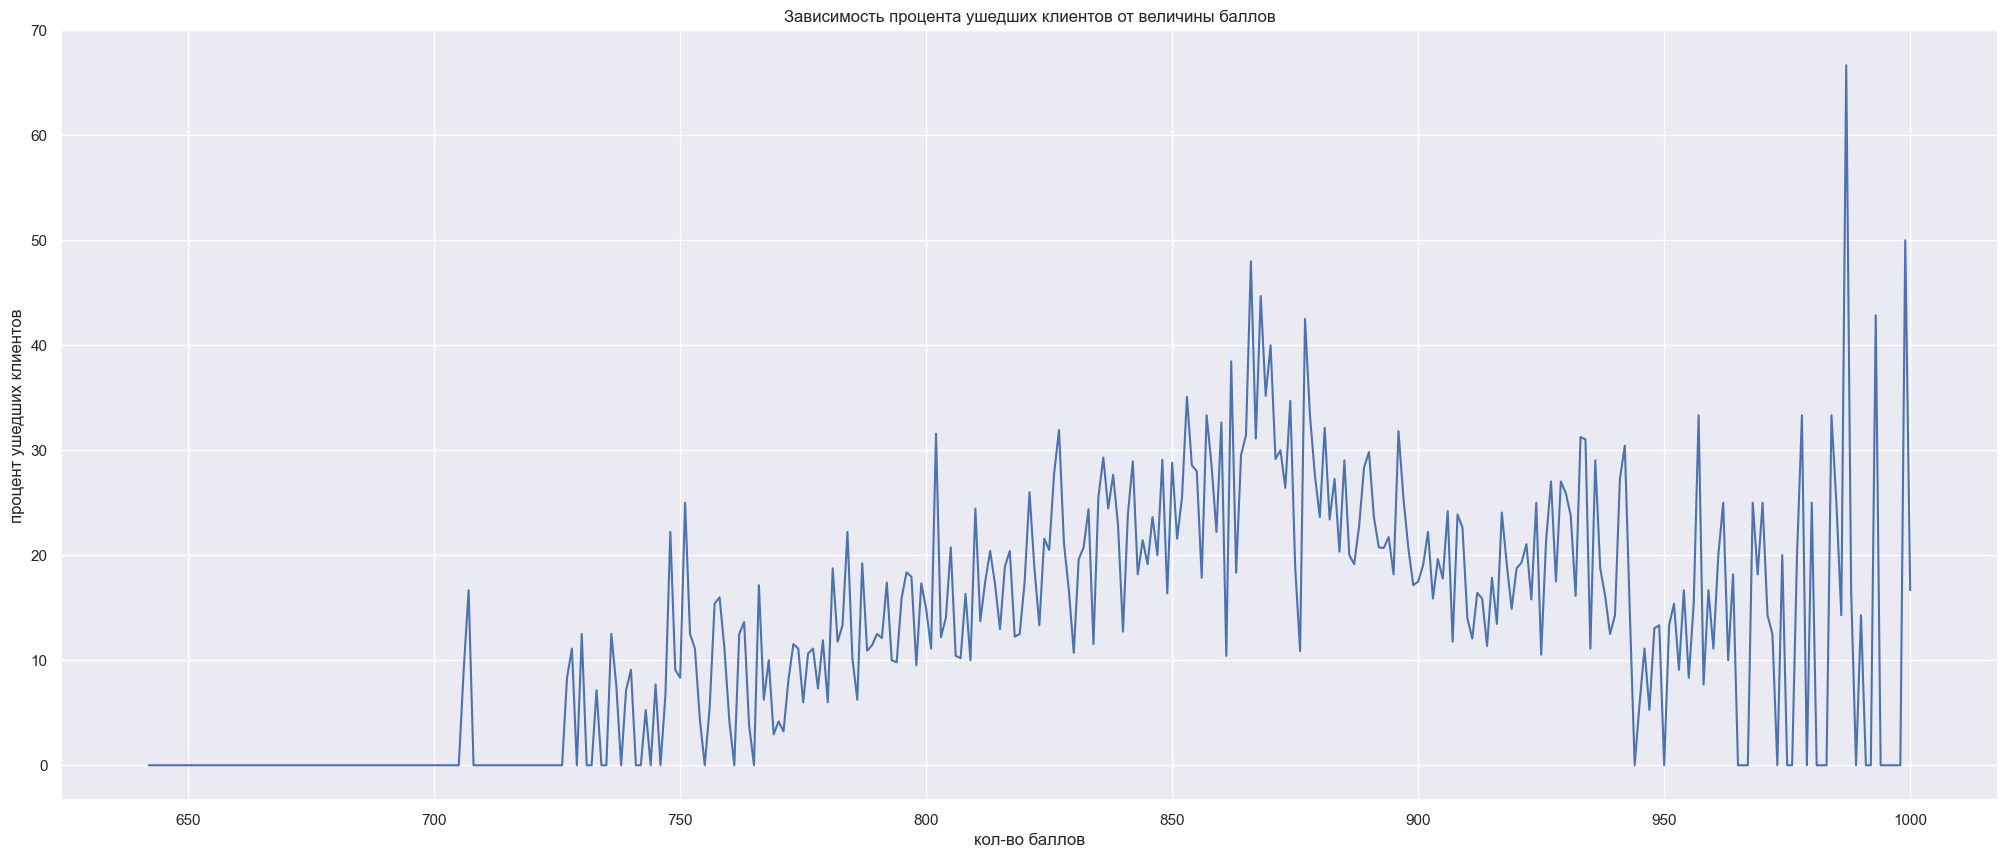

In [88]:
sns.lineplot(x = 'score', y = 'percent',  err_style='bars', data = quit_by_score)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('кол-во баллов')
plt.ylabel('процент ушедших клиентов')
plt.title('Зависимость процента ушедших клиентов от величины баллов')
plt.show();

Процент отточных клиентов по отношению к каждому конкретному числу баллов также резко увеличивается с 750 

In [89]:
score = data.query('score >= 750 and score <=950')
count_by_est_score = score['churn'].count()
sum_churn_est_score = sum(score['churn'])
round (sum_churn_est_score / count_by_est_score * 100)

20

Внутри среза с 750 до 950 баллов процент отточных клиентов составляет - 20 

In [90]:
count_by_est_score_total = data['churn'].count()
sum_churn_est_score = sum(score['churn'])
round (sum_churn_est_score / count_by_est_score_total * 100)

18

По отношению ко всему датафрейму этот процент равен 18

In [91]:
quit_by_salary = data.pivot_table(index=['round_salary'], values='churn', aggfunc= {'sum','count'})
quit_by_salary = quit_by_salary.reset_index()
quit_by_salary['percent'] = quit_by_salary['sum']/quit_by_salary['count']*100
quit_by_salary.sort_values(by = 'percent', ascending=False)

,round_salary,count,sum,percent
94,960000.0,3,2,66.666667
62,630000.0,3,2,66.666667
85,860000.0,3,2,66.666667
86,870000.0,5,3,60.000000
53,530000.0,2,1,50.000000
...,...,...,...,...
82,830000.0,4,0,0.000000
83,840000.0,1,0,0.000000
84,850000.0,3,0,0.000000
88,890000.0,4,0,0.000000


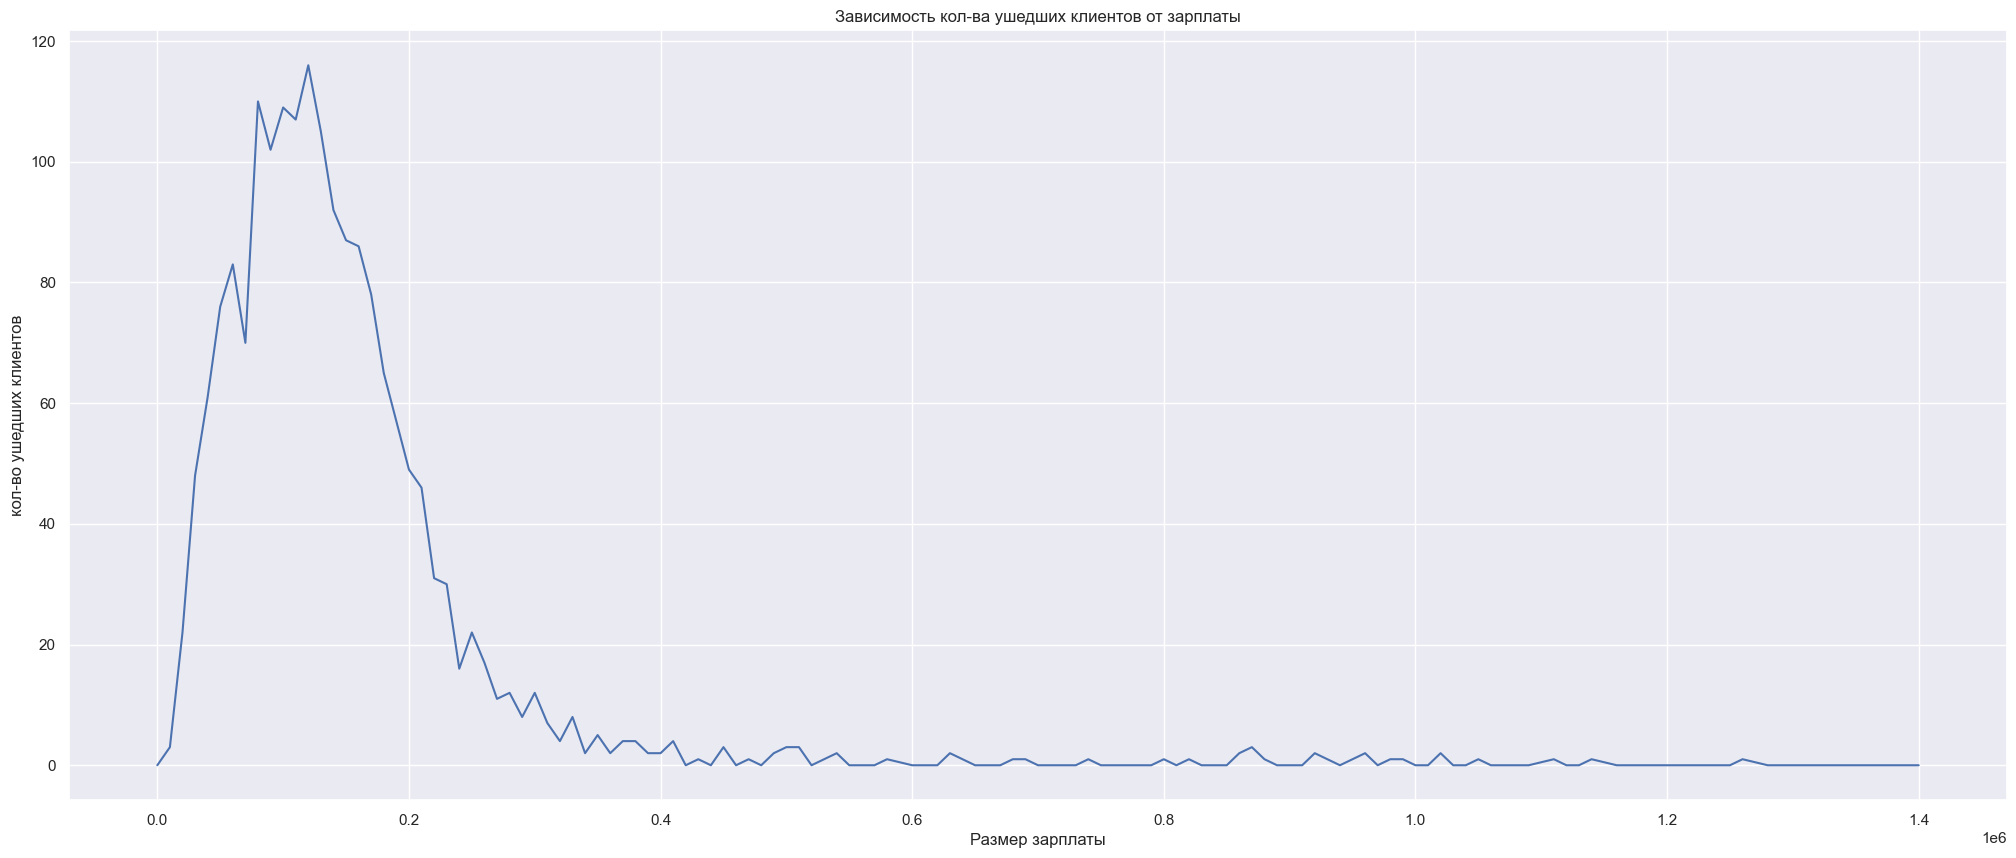

In [92]:
sns.lineplot(x = 'round_salary', y = 'sum',  err_style='bars', data = quit_by_salary)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('Размер зарплаты')
plt.ylabel('кол-во ушедших клиентов')
plt.title('Зависимость кол-ва ушедших клиентов от зарплаты')
plt.show()

Чаще всего уходят клиенты с зарплатой в пределах 200000 рублей

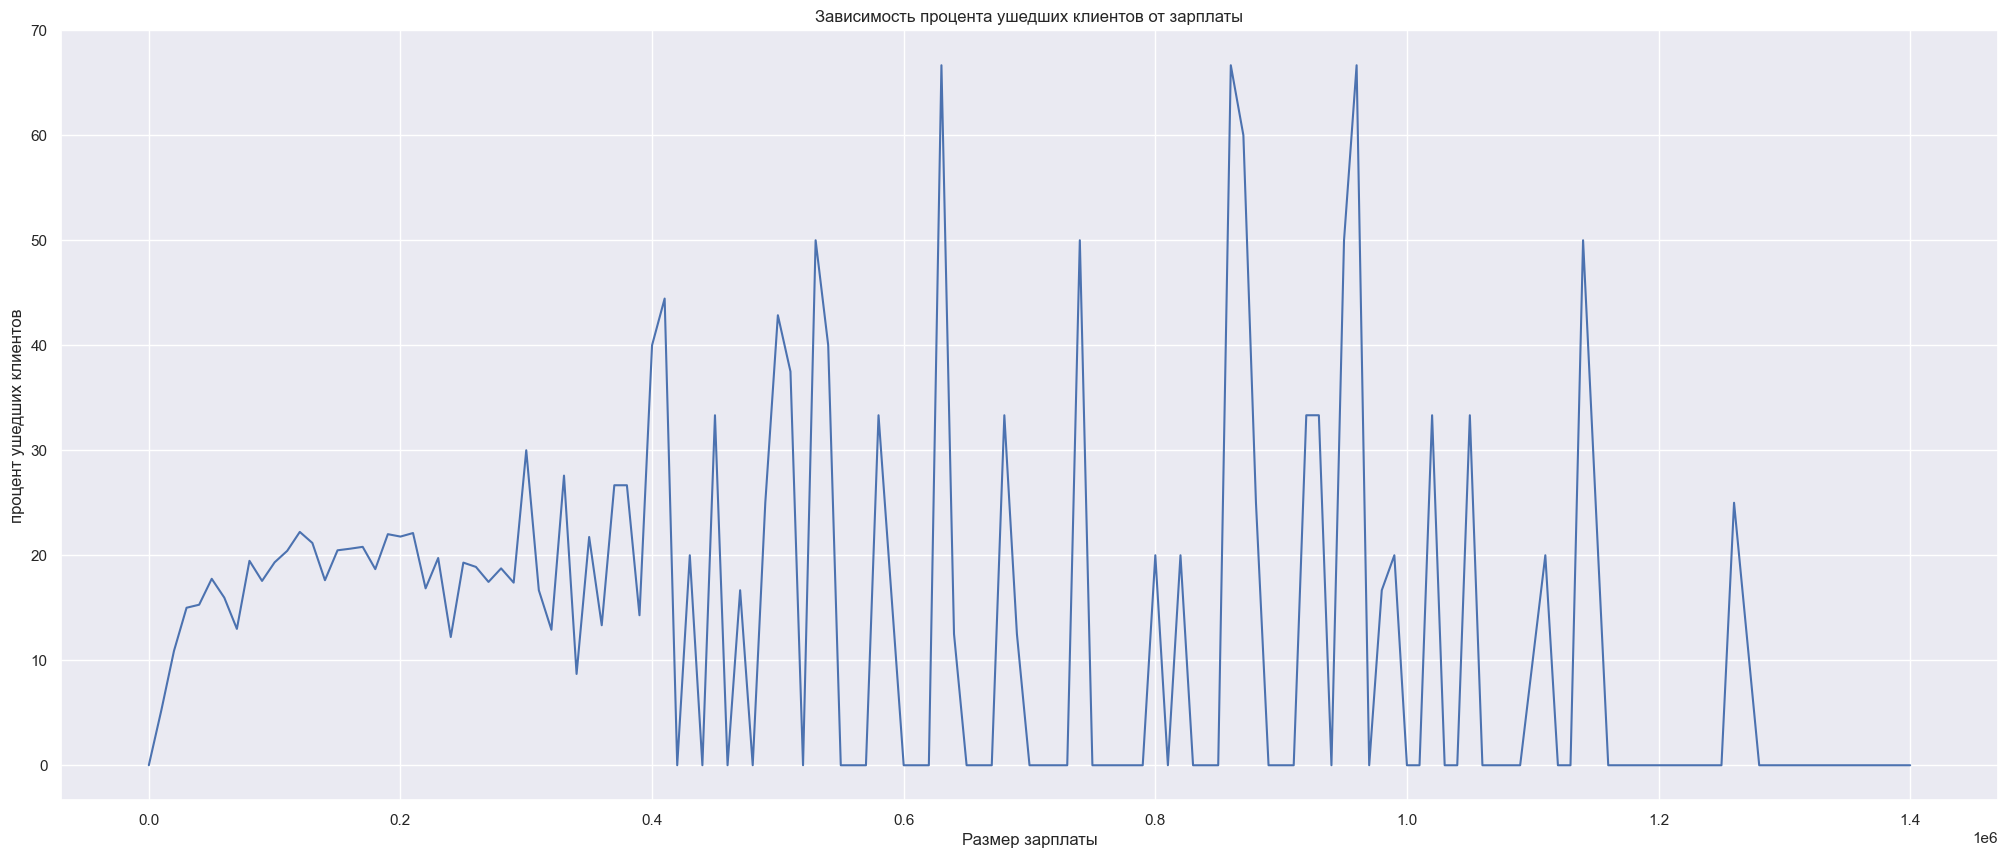

In [93]:
sns.lineplot(x = 'round_salary', y = 'percent',  err_style='bars', data = quit_by_salary)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('Размер зарплаты')
plt.ylabel('процент ушедших клиентов')
plt.title('Зависимость процента ушедших клиентов от зарплаты')
plt.show()

Процент отточных клиентов по отношению к конкретному уровню зарплаты распределем неравномерно. Поэтому срез мы будем делать по зависимости количества отточных клиентов, а не от их процента 

In [94]:
est_salary = data.query('est_salary >= 60000 and  est_salary <=200000 ')
count_by_est_salary_total= est_salary['churn'].count()
sum_churn_est_salary = sum(est_salary['churn'])
round (sum_churn_est_salary / count_by_est_salary_total * 100)

19

Как видно из графика внутри среза по зарплатам от 60000 до 200000 процент отточных клиентов 19 

In [95]:
est_salary2 = data.query('est_salary >= 200000 and  est_salary <=1400000 ')
count_by_est_salary_total= est_salary['churn'].count()
sum_churn_est_salary = sum(est_salary['churn'])
round (sum_churn_est_salary / count_by_est_salary_total * 100)

19

Внутри среза с 200000 до 14000000 процент составляет - 19 

In [96]:
count_by_est_salary_total= data['churn'].count()
sum_churn_est_salary = sum(est_salary['churn'])
round (sum_churn_est_salary / count_by_est_salary_total * 100)

13

По отношению ко всему датасету процент отточных клиентов больше в срезе от 60000 до 200000 - 13

In [97]:
count_by_est_salary_total= data['churn'].count()
sum_churn_est_salary = sum(est_salary2['churn'])
round (sum_churn_est_salary / count_by_est_salary_total * 100)

3

В срезе от 200000 до 1400000 он составляет всего 3

In [98]:
quit_by_city = data.pivot_table(index=['city'], values='churn', aggfunc= {'sum'})
quit_by_city.reset_index()

,city,sum
0,Ростов,266
1,Рыбинск,437
2,Ярославль,1117


Больше всего отточных клиетов в Ярославле 

In [99]:
city_ya = data.query('city == "Ярославль"')
count_by_city_ya= city_ya['churn'].count()
sum_churn_city_ya = sum(city_ya['churn'])
round (sum_churn_city_ya / count_by_city_ya * 100)

19

In [100]:
count_by_city_ya_total= data['churn'].count()
sum_churn_city_ya = sum(city_ya['churn'])
round (sum_churn_city_ya / count_by_city_ya_total * 100)

11

По отношению ко всему датасету процент отточных клиентов из Ярославля составляет - 11

In [101]:
city_r = data.query('city == "Ростов"')
count_by_city_r= city_r['churn'].count()
sum_churn_city_r = sum(city_r['churn'])
round (sum_churn_city_r / count_by_city_r * 100)

19

In [102]:
count_by_city_r= data['churn'].count()
sum_churn_city_r = sum(city_r['churn'])
round (sum_churn_city_r / count_by_city_r * 100)

3

По отношению ко всему датасету процент отточных клиентов из Ростова составляет - 11

Детальный обзор признаков позволяет составить широкие портреты отточных клиентов 

In [103]:
data_q = data.query('products >= 2 and products <=4\
                     and equity >= 3and equity <=5\
                     and last_activity != 0 \
                     and score >= 750 and score <=950\
                     and est_salary >= 60000 and  est_salary <=200000 \
                     and gender == "М"\
                     and city == "Ярославль"')

In [104]:
data_q_percent = sum(data_q['churn'])/data_q['churn'].count() * 100
round (data_q_percent)

50

Клиенты мужчины из Ярославля с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов в половине случаев уходят из банка

In [105]:
data_q_percent_total = sum(data_q['churn'])/data['churn'].count() * 100
round(data_q_percent_total)

2

По отношению ко всему датасету процент таких клиетов составляет - 2

In [106]:
data_z = data.query('products >= 2 and products <=4 \
                     and equity >= 3 and equity <=5 \
                     and last_activity != 0 \
                     and score >= 750 and score <=950 \
                     and est_salary >= 60000 and  est_salary <=200000 \
                     and gender == "Ж" \
                     and city == "Ярославль"')

In [107]:
data_z_percent = sum(data_z['churn'])/data_z['churn'].count() * 100
round (data_z_percent)

38

Клиенты женщины из Ярославля с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов почти в 40 % случаев уходят из банка 

In [108]:
data_z_percent_total = sum(data_z['churn'])/data['churn'].count() * 100
round (data_z_percent_total, 1)

1.8

По отношению ко всему датасету процент таких клиетов составляет - 1.8 

In [109]:
data_e = data.query('est_salary >= 60000 and  est_salary <=800000 \
                     and gender == "М" \
                     and city == "Ростов"')

In [110]:
data_e_percent = sum(data_e['churn'])/data_e['churn'].count() * 100
round (data_e_percent)

26

Четверть мужчин из Ростова с зарплатой от 60000 до 800000 

In [111]:
data_e_percent_total = sum(data_e['churn'])/data['churn'].count() * 100
round (data_e_percent_total, 1)

1.5

По отношению ко всему датасету процент таких клиетов составляет - 1.5

In [112]:
data_r = data.query('products >= 2 and products <=4\
                     and equity >= 3and equity <=5\
                     and last_activity != 0 \
                     and score >= 750 and score <=950\
                     and est_salary >= 60000 and  est_salary <=200000 \
                     and gender == "М"\
                     and city == "Рыбинск"')

Клиенты мужчины из Рыбинска с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов в почти половине случаев (46%) уходят из банка

In [113]:
data_r_percent = sum(data_r['churn'])/data_r['churn'].count() * 100
round (data_r_percent)

46

In [114]:
data_r_percent_total = sum(data_r['churn'])/data['churn'].count() * 100
round (data_r_percent_total, 1)

1.0

По отношению ко всему датасету процент таких клиетов составляет - 1

In [115]:
data_r_w = data.query('products >= 2 and products <=4\
                     and equity >= 3and equity <=5\
                     and last_activity != 0 \
                     and score >= 750 and score <=950\
                     and est_salary >= 60000 and  est_salary <=200000 \
                     and gender == "Ж"\
                     and city == "Рыбинск"')

Клиенты женщины из Рыбинска с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов в четверти случаях уходят из банка

In [116]:
data_r_w_percent = sum(data_r_w['churn'])/data_r_w['churn'].count() * 100
round (data_r_w_percent)

25

In [117]:
data_r_w_percent_total = sum(data_r_w['churn'])/data['churn'].count() * 100
round (data_r_w_percent_total, 1)

0.6

По отношению ко всему датасету процент таких клиетов составляет - 0.6

In [118]:
prod = data_q.pivot_table(index=['products'], values='churn', aggfunc= {'sum', 'count'})
prod.reset_index()
prod['percent'] = round( prod['sum']/  prod['count'] * 100)
prod['total'] = sum(prod['count'])                   
prod.sort_values(by = 'percent',ascending = False)

,count,sum,percent,total
products,,,,
4,56,37,66.0,379
3,61,33,54.0,379
2,262,118,45.0,379


Среди мужчин из Ярославля в вышеописанной категории 66 % случаев уходят пользователи 4 продуктов, 54 % - 3 продуктов и 45 % - 2 продуктов

In [119]:
equity = data_q.pivot_table(index=['equity'], values='churn', aggfunc= {'sum', 'count'})
equity.reset_index()
equity['percent'] = round( equity['sum']/  equity['count'] * 100)
equity['total'] = sum(equity['count'])                   
equity.sort_values(by = 'percent',ascending = False)

,count,sum,percent,total
equity,,,,
5,137,75,55.0,379
4,147,73,50.0,379
3,95,40,42.0,379


В данной категории также почти половина отточных клиентов среди собственников от 3 до 5 объектов 

In [120]:
last_activity = data_q.pivot_table(index=['last_activity'], values='churn', aggfunc= {'sum', 'count'})
last_activity.reset_index()
last_activity['percent'] = round( last_activity['sum']/  last_activity['count'] * 100)
last_activity.sort_values(by = 'percent',ascending = False)

,count,sum,percent
last_activity,,,
1,379,188,50.0


Те, кто недавно осуществлял активность также уходят в 50% случаев

In [121]:
score = data_q.pivot_table(index=['score'], values='churn', aggfunc= {'sum', 'count'})
score.reset_index()
score['percent'] = round( score['sum']/  score['count'] * 100)
score.sort_values(by = 'count',ascending = False)

,count,sum,percent
score,,,
814.0,9,2,22.0
870.0,8,8,100.0
822.0,7,4,57.0
826.0,6,3,50.0
838.0,6,4,67.0
...,...,...,...
771.0,1,0,0.0
892.0,1,1,100.0
758.0,1,0,0.0


In [122]:
round_salary = data_q.pivot_table(index=['round_salary'], values='churn', aggfunc= {'sum', 'count'})
round_salary = round_salary.reset_index()
round_salary['percent'] = round( round_salary['sum']/  round_salary['count'] * 100)
round_salary.sort_values(by = 'percent',ascending = False)


,round_salary,count,sum,percent
13,190000.0,14,13,93.0
7,130000.0,28,19,68.0
4,100000.0,32,18,56.0
8,140000.0,27,15,56.0
5,110000.0,29,15,52.0
12,180000.0,25,13,52.0
10,160000.0,20,10,50.0
3,90000.0,31,15,48.0
6,120000.0,33,16,48.0
0,60000.0,15,7,47.0


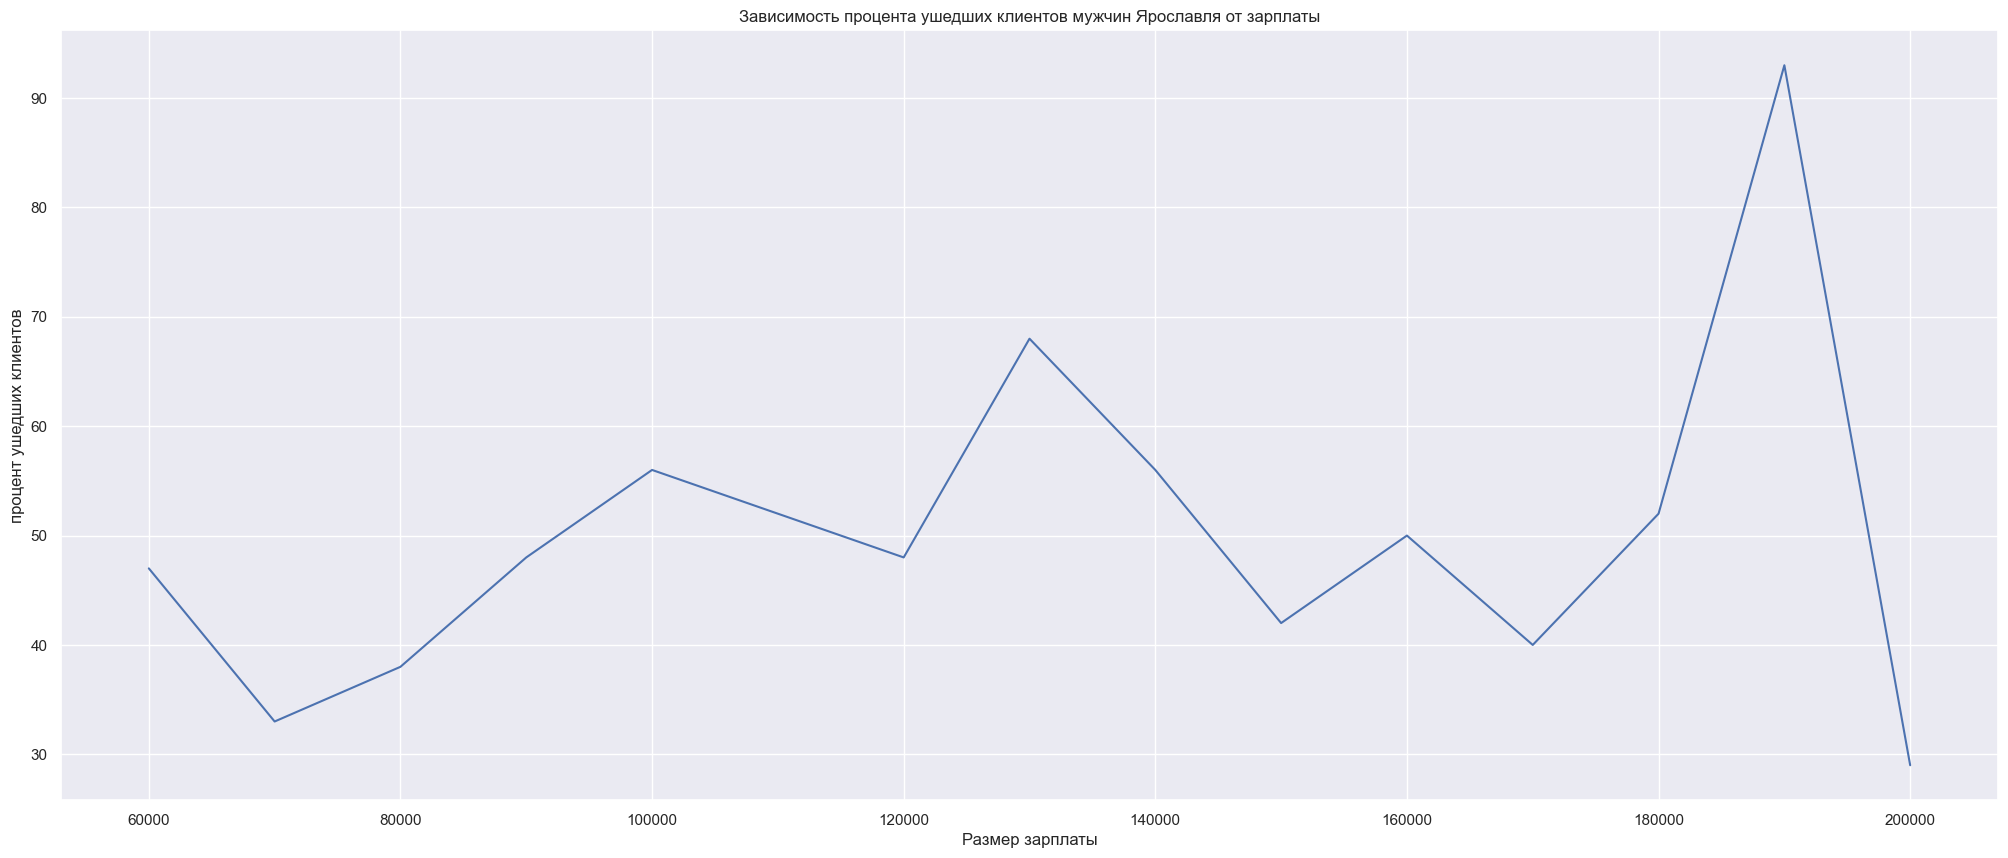

In [123]:
sns.lineplot(x = 'round_salary', y = 'percent',  err_style='bars', data = round_salary)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('Размер зарплаты')
plt.ylabel('процент ушедших клиентов')
plt.title('Зависимость процента ушедших клиентов мужчин Ярославля от зарплаты')
plt.show()

Наибольший процент отточных клиентов среди мужчин из Ярославля у тех, кто зарабатывает от 180000 до 190000. Также достаточно много отточных клиентов среди тех кто зарабатывает от 90000 до 160000

In [124]:
age = data_q.pivot_table(index=['age'], values='churn', aggfunc= {'sum', 'count'})
age['percent'] = age['sum']/  age['count'] * 100
age = age.reset_index()
count_by_age_m_ya = sum(age['count'])
sum__by_age_m_ya = sum(age['sum'])
round (sum__by_age_m_ya / count_by_age_m_ya * 100)

50

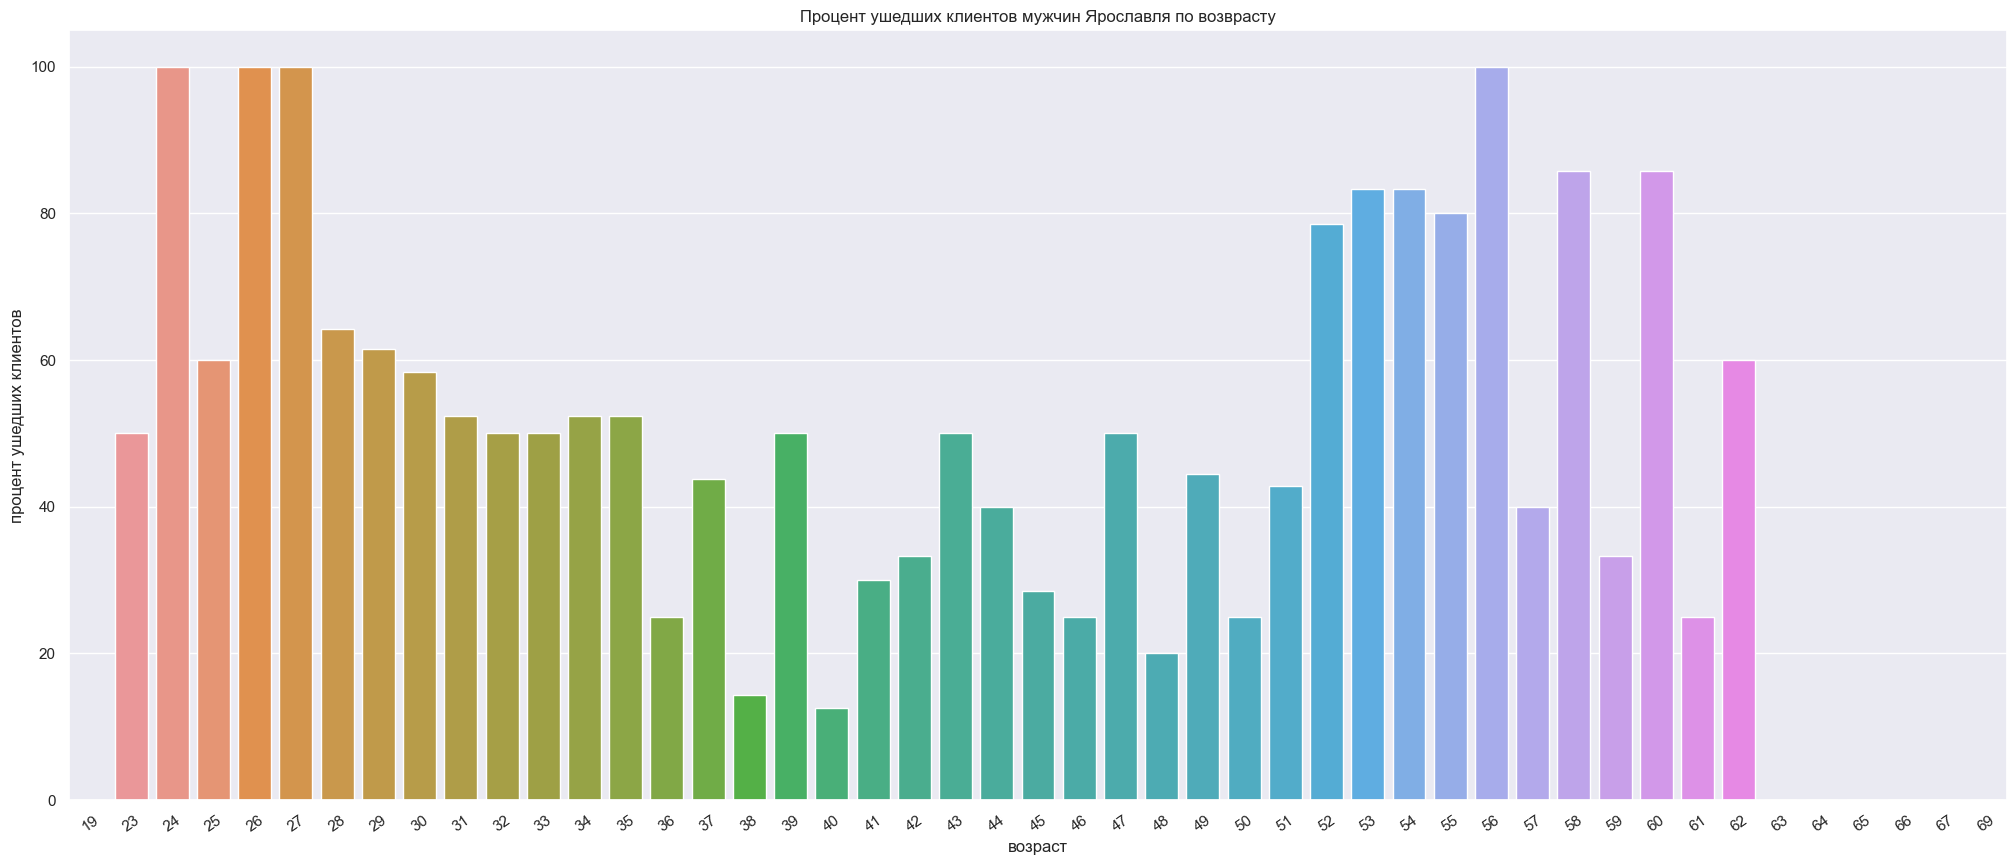

In [125]:
ax = sns.barplot(x= 'age', y='percent', data= age);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='процент ушедших клиентов', title = 'Процент ушедших клиентов мужчин Ярославля по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В возрастном соотношении отточных клиентов наибольший процент среди мужчин Ярославля в возрасте 26 и 27 лет, и от 52 до 60. В целом видно, что мужчины в возрасте от 52 лет до 60 наиболее склонны уходить из банков

In [126]:
age_23_35 = age.query('age >= 23 and age <= 35')
count_by_age_m_ya_23_35 = sum(age_23_35['count'])
sum__by_age_m_ya_23_35 = sum(age_23_35['sum'])
round (sum__by_age_m_ya_23_35 / count_by_age_m_ya_23_35 * 100)

58

In [127]:
age_52_62 = age.query('age >= 52 and age <= 62')
count_by_age_m_ya_52_62 = sum(age_52_62['count'])
sum__by_age_m_ya_52_62 = sum(age_52_62['sum'])
round (sum__by_age_m_ya_52_62 / count_by_age_m_ya_52_62 * 100)

72

Данные графика также подтверждаются простыми исчислениями. Мужчины из Ярославля в возрасте от 23 до 35 лет уходят в 58 % случаев, мужчины в возраста до 52 до 62 в 72 %. 

In [128]:
round_salary_w_ya = data_z.pivot_table(index=['round_salary'], values='churn', aggfunc= {'sum', 'count'})
round_salary_w_ya = round_salary_w_ya.reset_index()
round_salary_w_ya['percent'] = round( round_salary_w_ya['sum']/  round_salary_w_ya['count'] * 100)
round_salary_w_ya.sort_values(by = 'percent',ascending = False)

,round_salary,count,sum,percent
14,200000.0,10,6,60.0
6,120000.0,35,19,54.0
9,150000.0,32,16,50.0
11,170000.0,22,11,50.0
10,160000.0,31,15,48.0
12,180000.0,20,9,45.0
13,190000.0,12,5,42.0
4,100000.0,37,15,41.0
2,80000.0,30,11,37.0
5,110000.0,35,13,37.0


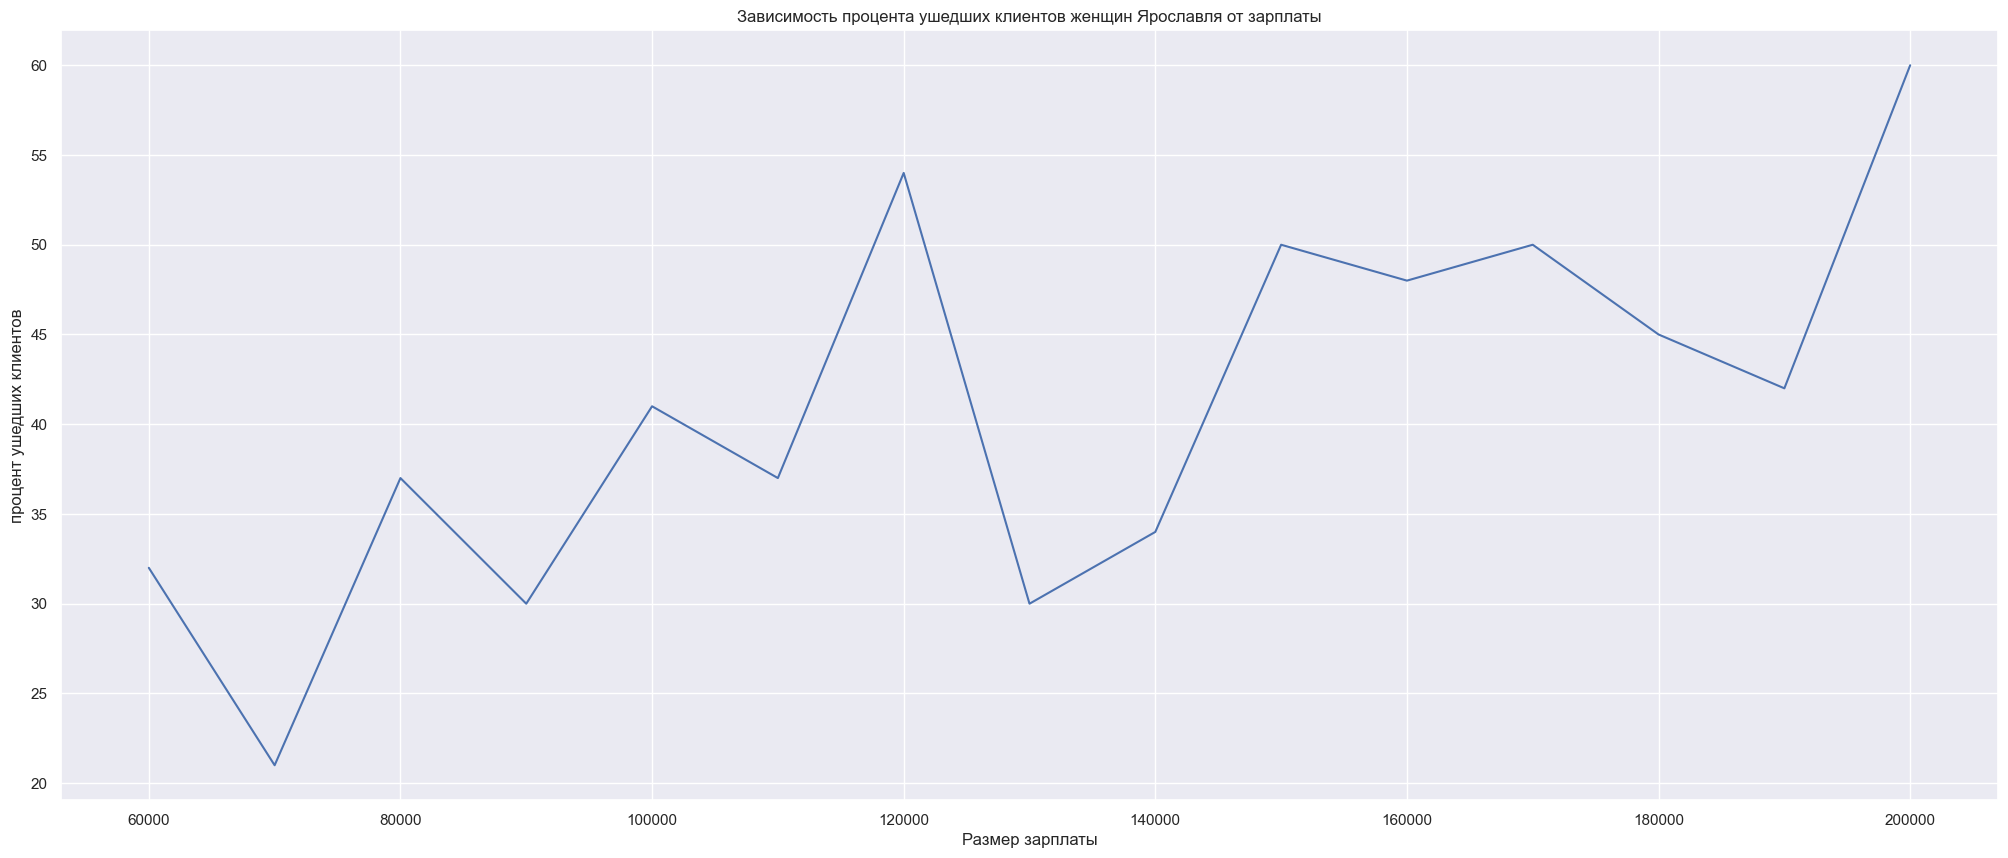

In [129]:
sns.lineplot(x = 'round_salary', y = 'percent',  err_style='bars', data = round_salary_w_ya)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('Размер зарплаты')
plt.ylabel('процент ушедших клиентов')
plt.title('Зависимость процента ушедших клиентов женщин Ярославля от зарплаты')
plt.show()

Наибольший процент отточных клиентов среди женщины из Ярославля у тех, кто зарабатывает от 150000 до 200000. Также достаточно много отточных клиентов среди тех кто зарабатывает от 80000 до 120000

In [130]:
age_w_ya = data_z.pivot_table(index=['age'], values='churn', aggfunc= {'sum', 'count'})
age_w_ya['percent'] = age_w_ya['sum']/  age_w_ya['count'] * 100
age_w_ya = age_w_ya.reset_index()
count_by_age_w_ya = sum(age_w_ya['count'])
sum__by_age_w_ya = sum(age_w_ya['sum'])
round (sum__by_age_w_ya / count_by_age_w_ya * 100)

38

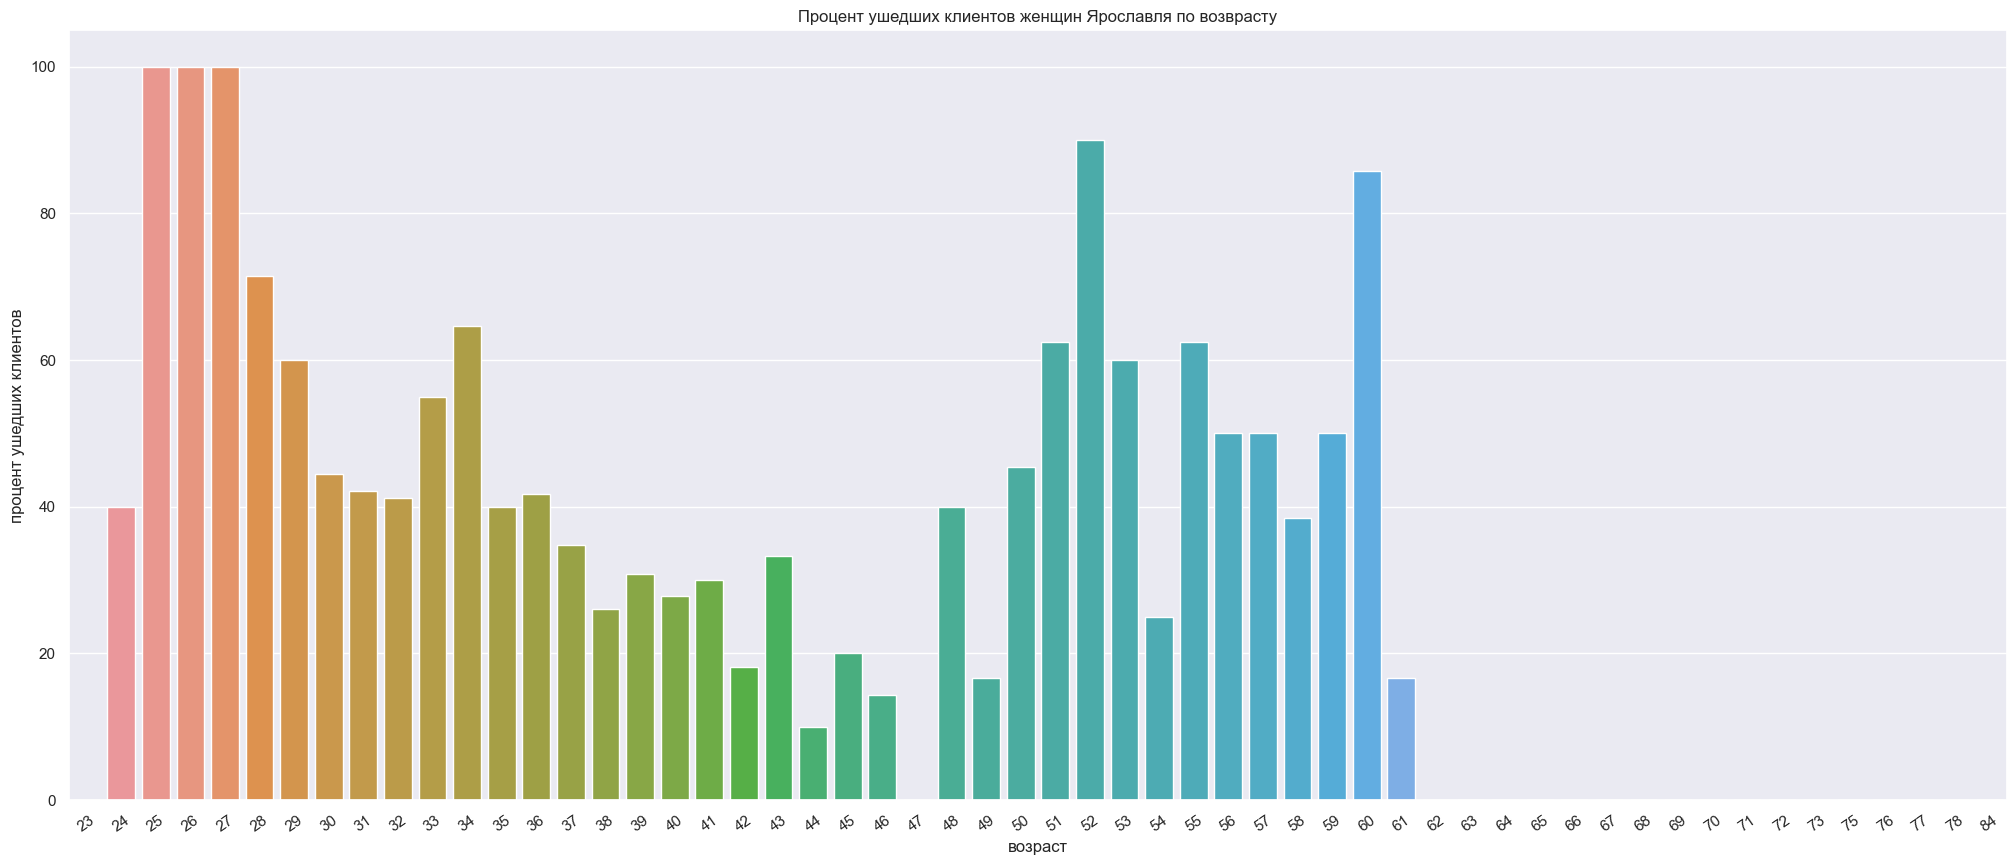

In [131]:
ax = sns.barplot(x= 'age', y='percent', data= age_w_ya);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='процент ушедших клиентов', title = 'Процент ушедших клиентов женщин Ярославля по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В возрастном соотношении отточных клиентов наибольший процент среди женщин Ярославля в возрасте 26 и 27 лет. Как видно среди жещин больше отточных клиентов среди молодежи

In [132]:
round_salary_e_r = data_e.pivot_table(index=['round_salary'], values='churn', aggfunc= {'sum', 'count'})
round_salary_e_r = round_salary_e_r.reset_index()
round_salary_e_r['percent'] = round( round_salary_e_r['sum']/  round_salary_e_r['count'] * 100)
round_salary_e_r.sort_values(by = 'count',ascending = False)

,round_salary,count,sum,percent
2,80000.0,50,15,30.0
1,70000.0,50,9,18.0
4,100000.0,48,14,29.0
5,110000.0,43,14,33.0
7,130000.0,39,9,23.0
8,140000.0,38,5,13.0
9,150000.0,36,8,22.0
3,90000.0,35,9,26.0
6,120000.0,29,11,38.0
10,160000.0,27,6,22.0


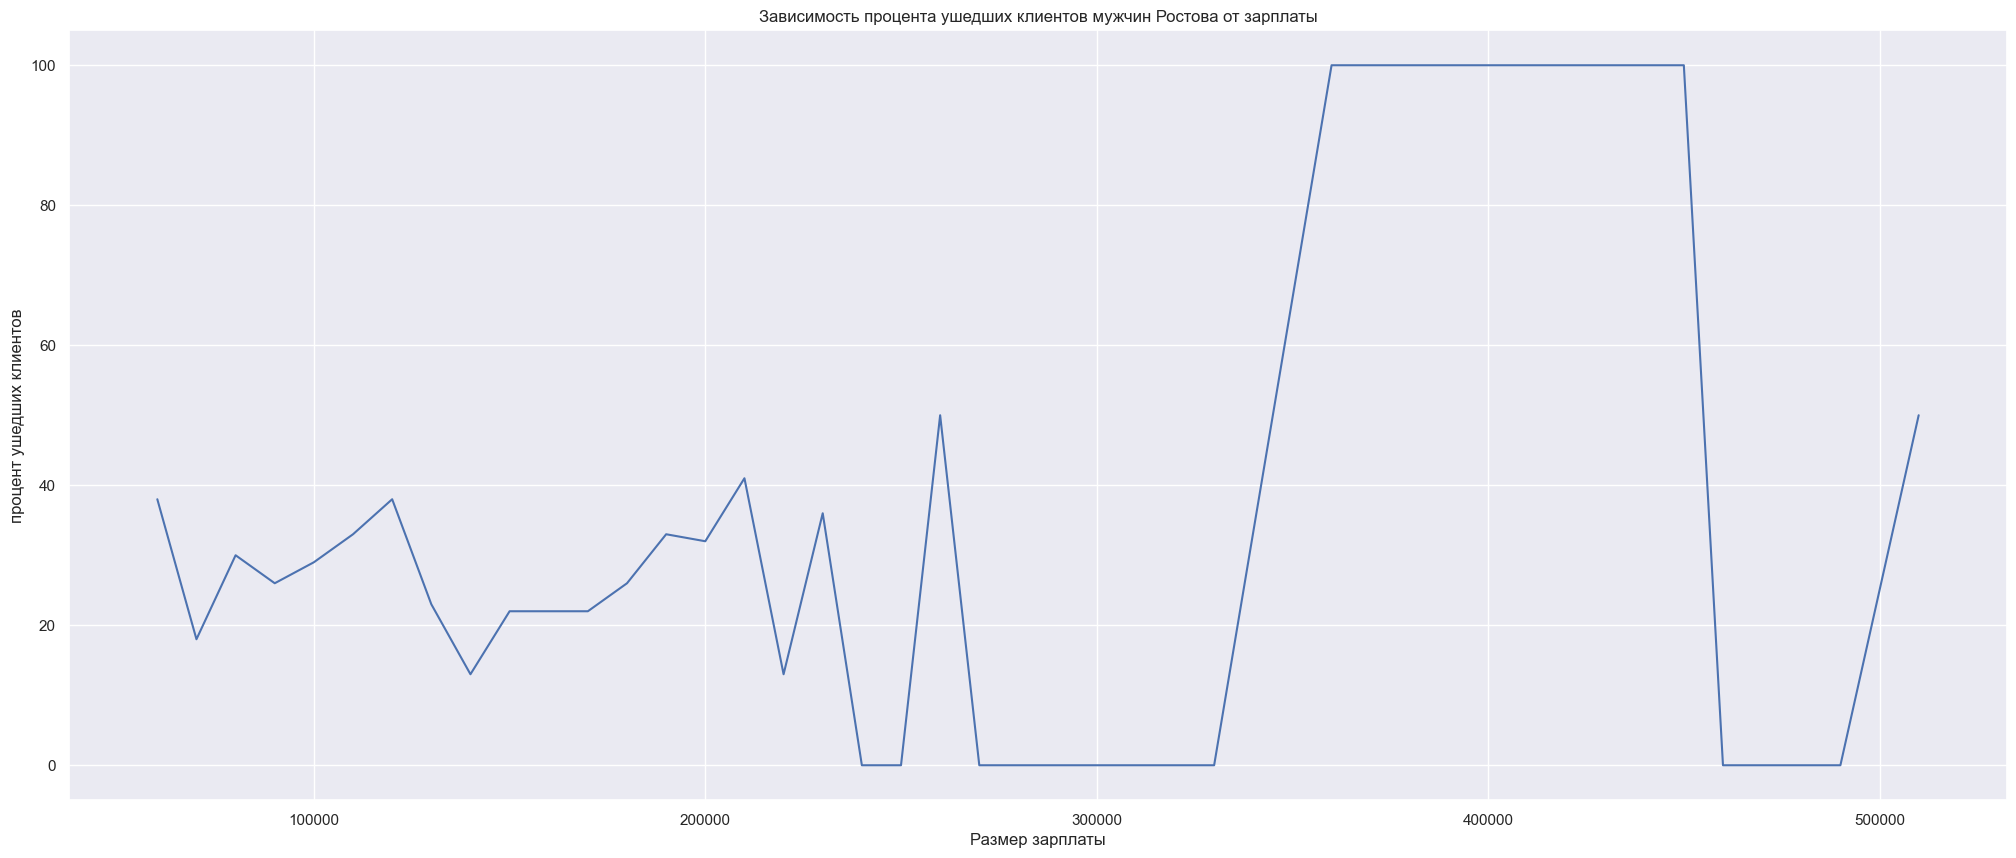

In [133]:
sns.lineplot(x = 'round_salary', y = 'percent',  err_style='bars', data = round_salary_e_r)
sns.set (rc={'figure.figsize':( 25 , 10 )})
plt.xlabel('Размер зарплаты')
plt.ylabel('процент ушедших клиентов')
plt.title('Зависимость процента ушедших клиентов мужчин Ростова от зарплаты')
plt.show()

Наибольший процент отточных клиентов среди мужчин из Ростова у тех, кто зарабатывает от 350000 до 400000. 

In [134]:
age_m_r = data_e.pivot_table(index=['age'], values='churn', aggfunc= {'sum', 'count'})
age_m_r['percent'] = age_m_r['sum']/  age_m_r['count'] * 100
age_m_r = age_m_r.reset_index()
count_by_age_m_r = sum(age_m_r['count'])
sum__by_age_m_r = sum(age_m_r['sum'])
round (sum__by_age_m_r / count_by_age_m_r * 100)

26

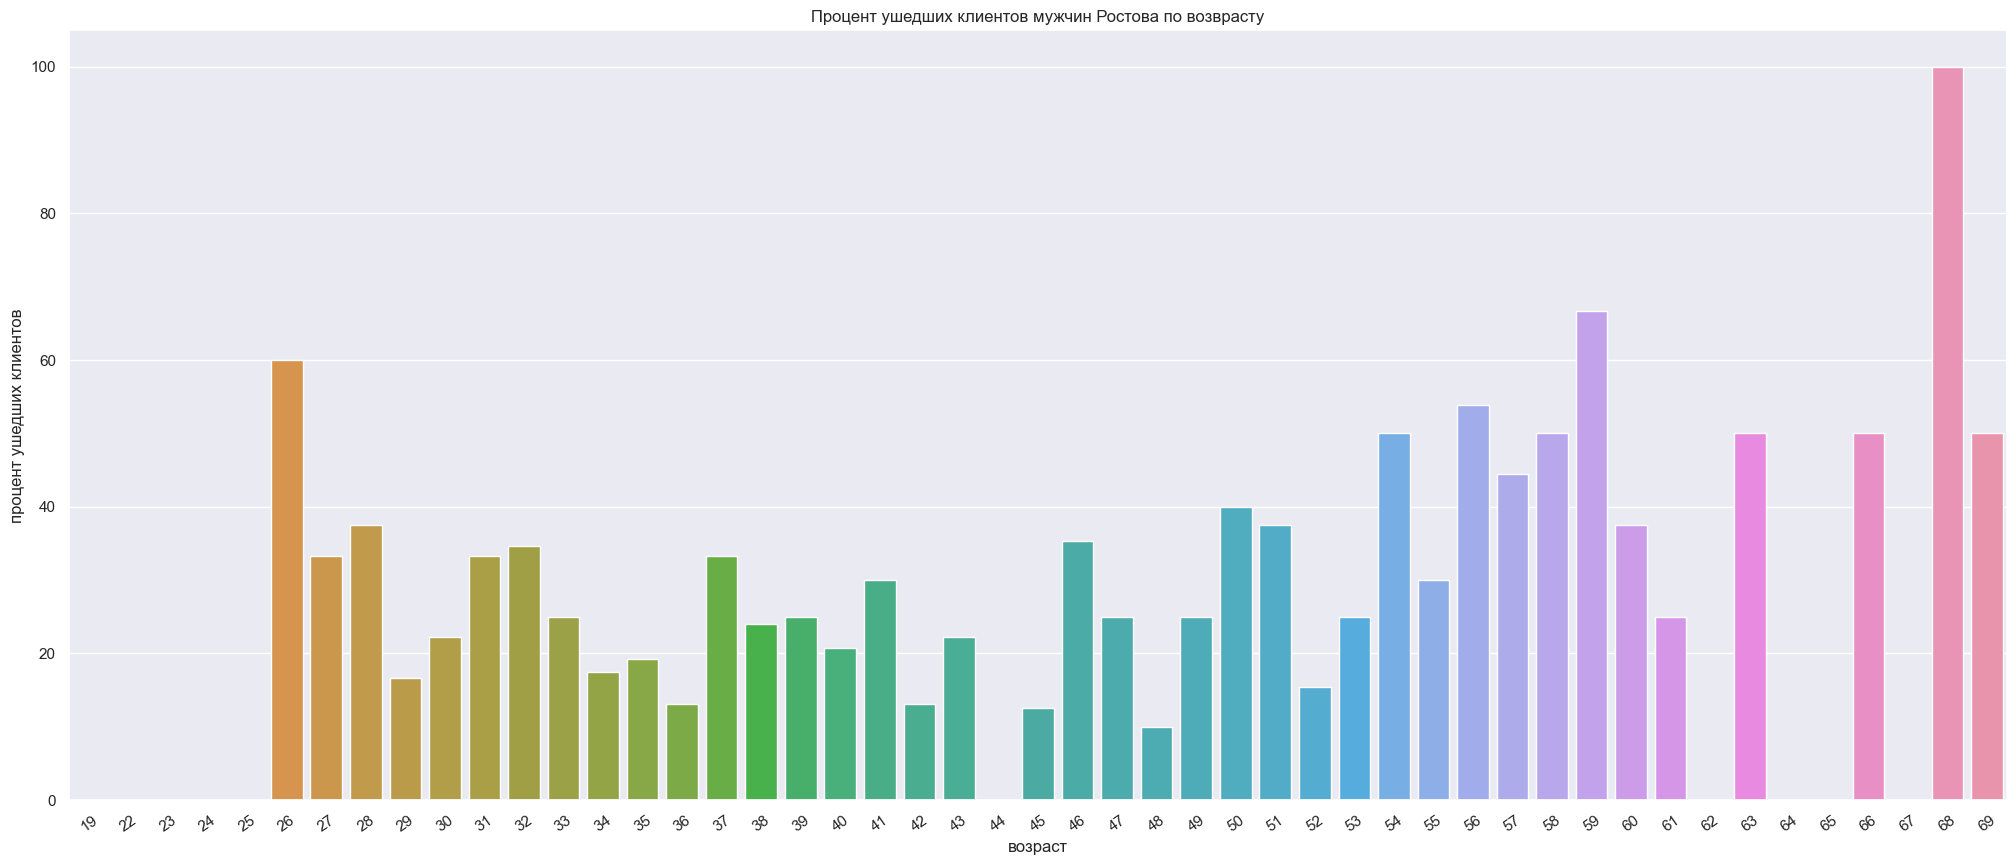

In [135]:
ax = sns.barplot(x= 'age', y='percent', data= age_m_r);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='процент ушедших клиентов', title = 'Процент ушедших клиентов мужчин Ростова по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В возрастном соотношении отточных клиентов  процент среди мужчин  Ростова распространен относительно на одном уровне

In [136]:
age_m_ry = data_r.pivot_table(index=['age'], values='churn', aggfunc= {'sum', 'count'})
age_m_ry['percent'] = age_m_ry['sum']/  age_m_ry['count'] * 100
age_m_ry = age_m_ry.reset_index()
count_by_age_m_ry = sum(age_m_ry['count'])
sum__by_age_m_ry = sum(age_m_ry['sum'])
round (sum__by_age_m_ry / count_by_age_m_ry * 100)

46

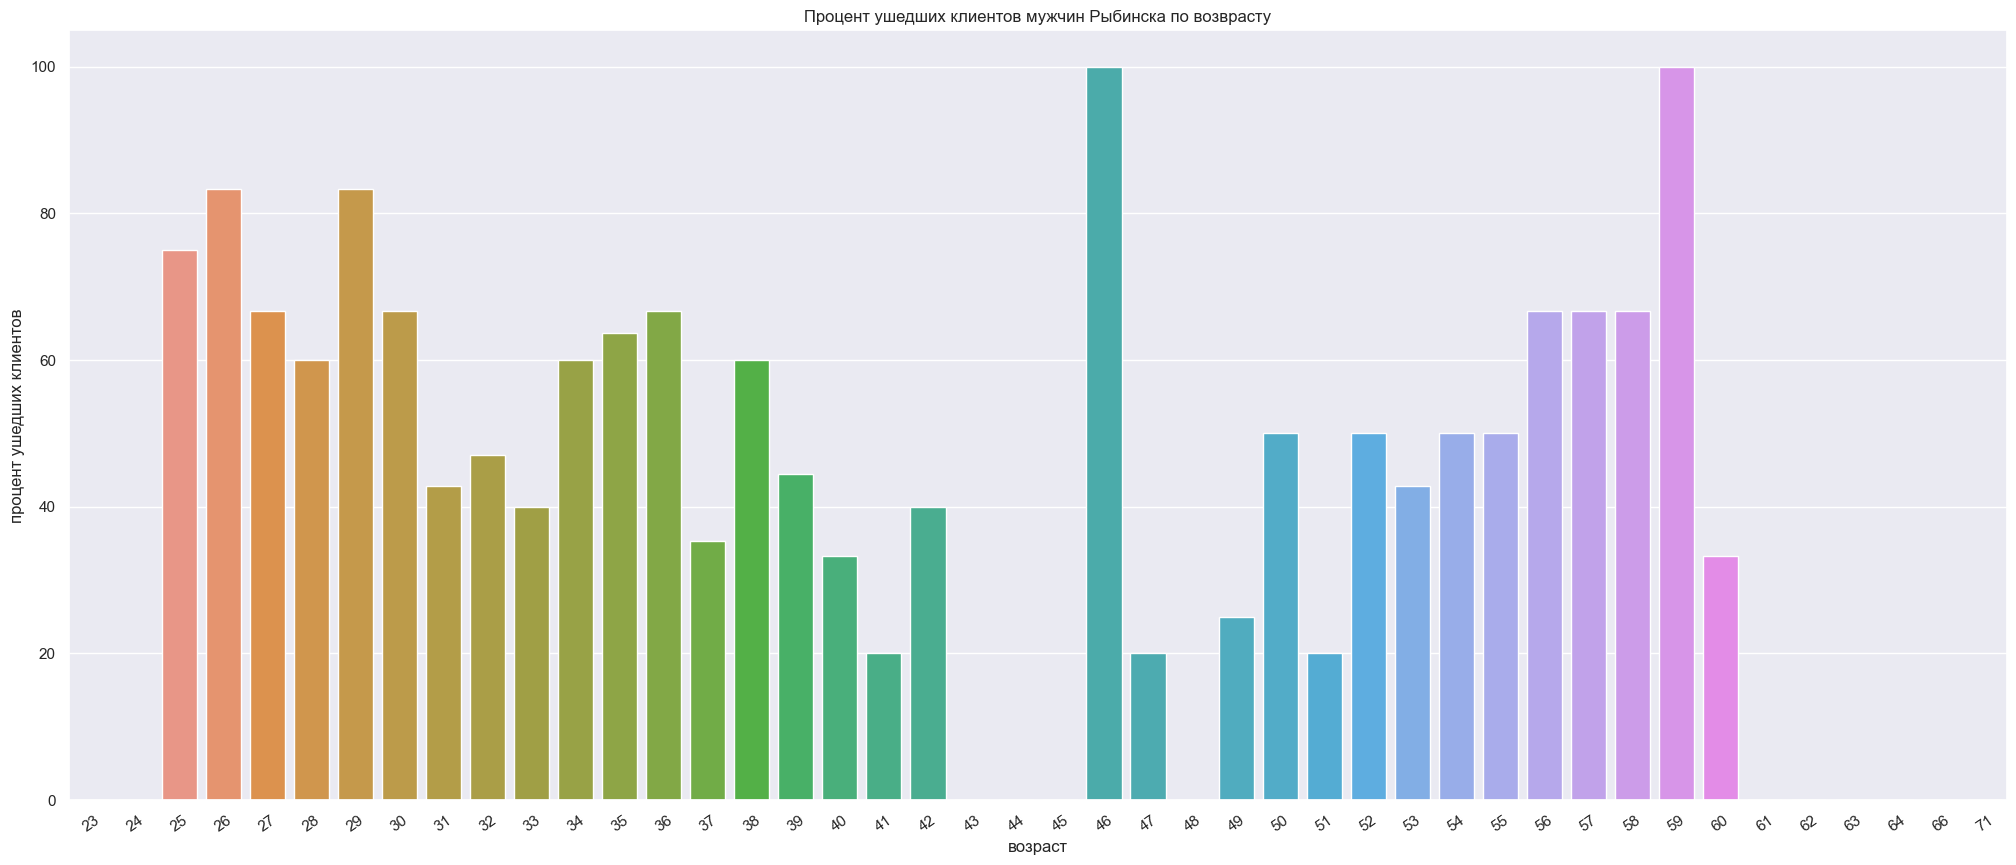

In [137]:
ax = sns.barplot(x= 'age', y='percent', data= age_m_ry);
sns.set (rc={'figure.figsize':( 25 , 10 )})
ax.set (xlabel='возраст', ylabel='процент ушедших клиентов', title = 'Процент ушедших клиентов мужчин Рыбинска по возврасту');
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35);

В возрастном соотношении отточных клиентов  процент среди мужчин  Рыбинска проходит отрезках от 25 до 42 лет, а также в возрасте от 46 до 60 лет. 

Вывод к этому разделу. 

К сожалению заменить пропуски в колонке balance не получилось, поскольку не выявляна связь пропусков ни с одним пропуском. В соответвии с класификацией, эти пропуски можно отнести к MAR. 

В целом из банка ушло 18 % пользователей. Почти пятая часть. 

Признаки отточности и интервалы

В целом наибольшее число отточных клиентов, пользовавшихся от 2 до 4 продуктов, владевших от 3 до 5 объектами собственности, бывшими активными в последнее время, являющихся жителями Ярославля в возрастной группе от 24 до 37 лет, а также от 48 до 60 лет. Эти данные позволили выявить портреты клиентов, чаще всего уходящими из банка. 

Портреты. 

Клиенты мужчины в возрасте 26 и 27 лет, и от 52 до 60  из Ярославля с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов в половине случаев уходят из банка

Клиенты женщины из Ярославля с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов почти в 40 % случаев уходят из банка. При это ушли все женщины в возрасте от 25 до 28 лет.

Четверть мужчин из Ростова с зарплатой от 60000 до 800000. Наибольший процент отточных клиентов среди мужчин из Ростова у тех, кто зарабатывает от 350000 до 400000. 

Клиенты мужчины из Рыбинска с зарплатой от 60000 до 200000 с 2 до 4 продуктов, с 3 до 5 объктами собственности, активные в последнее время, с 750 до 950 баллов в почти половине случаев (46%) уходят из банка. В возрастном соотношении отточных клиентов  процент среди мужчин  Рыбинска проходит отрезках от 25 до 42 лет, а также в возрасте от 46 до 60 лет. 

В наименьшей степени склонны покидать банк клиенты, пользующиеся 1-2 продуктами, владеющие 1-2 объектами собственности, либо 6-9 объектами, те, кто не были активным в последнее время, а также зарабатывают более 200000, преимущественно люди старше 60 лет, из которых больше женщин




Проверка статистических гипотез

Поскольку мне нужно узнать равенство среднего значения зарплаты клиентов сразу по нескольким признакам, то целесообразно провести t-тест. Этот тест позволяет провести  проверку двусторонней гипотезы о равенстве среднего генеральной совокупности. 

В качестве нулевой гипотезы я выбрал утверждение, что 

H0 Средняя зарплата между ушедшими и оставшимися клиентами не отличается 

H1 Средняя зарплата между ушедшими и оставшимися клиентами разная 


In [138]:
quit_st_1 = data.loc[data['churn'] == 1]['est_salary']
stay_st_1 = data.loc[data['churn'] == 0]['est_salary']
# results - вызов метода для проверки гипотез
results = st.ttest_ind(quit_st_1, stay_st_1, equal_var=False, nan_policy = 'omit')
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу ')

0.8958601902766118
Не получилось отвергнуть нулевую гипотезу 


 Средняя зарплата между ушедшими и оставшимися клиентами не отличается 

В качестве нулевой гипотезы я выбрал утверждение, что 

H0 Средняя зарплата между  пользователями 2 и более продуктов  не отличается 

H1 Средняя зарплата между  пользователями 2 и более продуктов  разная 

Выбор обусловлен тем, что по данному признаку больше всего отточных клиентов у пользователей 2 продуктов

In [139]:
quit_st_2 = data.loc[data['products'] == 2]['est_salary']
stay_st_2 = data.loc[data['products'] > 2]['est_salary']
# results - вызов метода для проверки гипотез
results = st.ttest_ind(quit_st_2, stay_st_2, equal_var=False, nan_policy = 'omit')
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу ')

0.21331715508863017
Не получилось отвергнуть нулевую гипотезу 


Средняя зарплата между пользователями 2 и более продуктов не отличается

H0 Средняя зарплата между людьми в возрасте от 25 до 37 лет и людьми в возрасте от 48 до 60 лет не отличается

H1 Средняя зарплата между людьми в возрасте от 25 до 37 лет и людьми в возрасте от 48 до 60 лет отличается

Выбор обусловлен тем, что по данному признаку между людьми в возрасте от 25 до 37 лет и людьми в возрасте от 48 до 60 лет больше всего отточных клиентов

In [140]:
quit_st_4 = data.query('age >= 25 and age <=47')['est_salary']
stay_st_4 = data.query('age >= 48 and age <=60')['est_salary']
# results - вызов метода для проверки гипотез
results = st.ttest_ind(quit_st_4, stay_st_4, equal_var=False, nan_policy = 'omit')
# alpha - значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу ')

1.0420223495737756e-05
Отвергаем нулевую гипотезу


H0 Средняя зарплата между людьми в возрасте от 25 до 47 лет и людьми в возрасте от 48 до 60 лет отличается


Средний уровень доходов сразу по нескольким признакам (отточность, количество продуктов) не отличается. Средняя зарплата между людьми в возрасте от 25 до 47 лет и людьми в возрасте от 48 до 60 лет отличается. Тем не менее по признаку возраста корреляция была не очень высокая. Таким образом, можно сказать, что уровень доходов мало влияет на отточность клиетов.  

Выделение сегментов 

Выделим сегменты в соотвествии с теми признакми, что мы выделили в исследовательском анализе данных

In [141]:
seg1 = data.query('products >= 2 and est_salary >= 30000 and  est_salary <=300000 and gender == "М" and city == "Ярославль" and age >= 23 and age <= 47')

In [142]:
seg2 = data.query('products <= 2 and est_salary >= 30000 and  est_salary <=300000 and gender == "М" and city == "Ярославль" and age >= 48 and age <= 62')

In [143]:
seg3 = data.query('products >= 2 and products <=4 \
                     and equity >= 3 and equity <=5 \
                     and last_activity != 0 \
                     and score >= 750 and score <=950 \
                     and est_salary >= 60000 and  est_salary <=200000 \
                     and gender == "Ж" \
                     and city == "Ярославль"\
                     and age >=24 and age <=37')

In [144]:
seg4 = data.query('products <= 2 \
                     and est_salary >= 60000 and  est_salary <=300000 \
                     and gender == "Ж"\
                     and city == "Ярославль"')

In [145]:
seg5 = data.query('products <= 2\
                     and gender == "М" \
                     and city == "Ростов"')

In [146]:
seg6= data.query('products <= 2\
                     and gender == "М"\
                     and city == "Рыбинск"')

In [147]:
final1 = seg1.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()
final2 = seg2.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()
final3 = seg3.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()
final4 = seg4.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()
final5 = seg5.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()
final6 = seg6.pivot_table(index=['gender', 'city','avarage_age'], values='churn', aggfunc= {'sum', 'count'}).reset_index()

In [148]:
final_segments = pd.concat([final1, final2, final4 ,final5, final6], join="inner")


In [151]:
final_segments['percent'] = round(final_segments['sum']/final_segments['count'] * 100)
final_segments['percent_from_total'] =  final_segments['sum']/data['churn'].count() * 100
final_segments = final_segments.reset_index()
final_segments = final_segments.query('count > 600')
final_segments

,level_0,index,gender,city,avarage_age,count,sum,percent,percent_from_total
0,1,1,М,Ярославль,возраст между 24 и 47,1266,399,32.0,4.019341
1,5,1,Ж,Ярославль,возраст между 24 и 47,1143,128,11.0,1.289413
2,13,1,М,Рыбинск,возраст между 24 и 47,846,160,19.0,1.611766


Среди людей пользующихся более чем 2мя продуктами больше всего отточных клиентов в сегментах со следующими признаками: 
1. Мужчины из Ярославля в возрасте от 24 до 47 лет - 32 % 
2. Мужчины из Рыбинска в возрасте от 24 до 47 лет - 19 % 
3. Женщины из Ярославля в возрасте от 24 до 47 лет - 11 % 


Выводы 

В данном проекте я 
1. Провел предобработку данных 
2. Выяснил почему нельзя заменить пропуски в колонке balance 
3. Выявил основные признаки отточности клиетов, к которым относится количество продуктов, собственности,активность, баллы, пол, город, возраст и заработок 
4. Выявил основные портреты оттоковых клиетов, а также выделил признаки неотточных клиентов.
5.  Проверил статистические гипотезы о: 
- равенстве средних доходов между ушедшими и оставшимися клиентами. Таких отличий нет. 
- равенстве средних доходов между теми, кто пользовался 2мя и более продуктов. Таких отличий нет 
- равенстве средних доходов между людьми возрастных групп от 25 до 47 лет и доходами людей в возрасте от 48 до 60 лет. Таких отличий нет
6. Выделил сегменты с наибольшим процентов оттока: 
- Мужчины из Ярославля в возрасте от 24 до 47 лет - 32 % 
- Мужчины из Рыбинска в возрасте от 24 до 47 лет - 19 % 
- Женщины из Ярославля в возрасте от 24 до 47 лет - 11 % 


В качестве рекомендации я бы обратил внимание на то, какими продуктами пользовались клиенты. Для этого можно было бы провести соц опрос или интервью с сжатой выборкой. 




## Материалы 
[ Презентация ] (https://disk.yandex.ru/i/j-BaB5EvpThTKQ) 


[ Дашборд ] (https://public.tableau.com/app/profile/alexander.rozhkov6559/viz/_16897019961050/Dashboard1?publish=yes)